In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

### Data Cleaning:

In [2]:
#Load datasets
fao = pd.read_csv('Datasets/FAO.csv', encoding='latin1')
faostat = pd.read_csv('Datasets/FAOSTAT.csv', encoding='latin1')

FileNotFoundError: [Errno 2] No such file or directory: 'FAO.csv'

In [ ]:
## Create data dictionary for FAO DataFrame
fao_data_dictionary = pd.DataFrame({
    'Column Name': fao.columns,
    'Data Type': fao.dtypes,
    'Description': [
        'Abbreviation of the area (country or region)',
        'Numeric code representing the area',
        'Name of the area (country or region)',
        'Numeric code representing the item (e.g., crop, livestock)',
        'Name of the item (e.g., crop, livestock)',
        'Numeric code representing the element (e.g., production, yield)',
        'Name of the element (e.g., production, yield)',
        'Unit of measurement (e.g., tonnes, hectares)',
        'Latitude of the area, if applicable',
        'Longitude of the area, if applicable',
        'Values for each year from 1961 to 2013, representing the data for the respective year'
    ] + [''] * (len(fao.columns) - 11)  # Fill remaining descriptions if needed
})

# Create data dictionary for FAOSTAT DataFrame
faostat_data_dictionary = pd.DataFrame({
    'Column Name': faostat.columns,
    'Data Type': faostat.dtypes,
    'Description': [
        'Code representing the domain of the data (e.g., crops, livestock)',
        'Name of the domain (e.g., crops, livestock)',
        'Numeric code representing the area (country or region)',
        'Name of the area (country or region)',
        'Numeric code representing the element (e.g., production, yield)',
        'Name of the element (e.g., production, yield)',
        'Numeric code representing the item (e.g., crop, livestock)',
        'Name of the item (e.g., crop, livestock)',
        'Numeric code representing the year of the data entry',
        'Year of the data entry',
        'Unit of measurement (e.g., tonnes, hectares)',
        'Value of the data point',
        'Code indicating special notes or exceptions about the data point',
        'Description of the flag',
        'Additional notes or comments regarding the data point'
    ] + [''] * (len(faostat.columns) - 15)  # Fill remaining descriptions if needed
})

In [ ]:
# Handling Missing Values
# Checking for missing values before filling
fao_missing_before = fao.isnull().sum()
fao_stat_missing_before = faostat.isnull().sum()

print("Missing values before filling NaN with 0:")
print(fao_missing_before)
print(fao_stat_missing_before)

# Replace NaN values with 0 in the fao DataFrame
fao = fao.fillna(0)

# Replace NaN values with 0 in the faostat DataFrame
faostat = faostat.fillna(0)

# Checking for missing values after filling
fao_missing_after = fao.isnull().sum()
fao_stat_missing_after = faostat.isnull().sum()

print("\nMissing values after filling NaN with 0:")
print(fao_missing_after)
print(fao_stat_missing_after)

Missing values before filling NaN with 0:
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64

Missing values after filling NaN with 0:
Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
                    ..
Y2009                0
Y2010                0
Y2011                0
Y2012                0
Y2013                0
Length: 63, dtype: i

In [ ]:
# Removing Duplicates
fao.drop_duplicates(inplace=True)
faostat.drop_duplicates(inplace=True)

In [ ]:
# Standardizing Column Names
fao.columns = fao.columns.str.lower().str.replace(' ', '_')
faostat.columns = faostat.columns.str.lower().str.replace(' ', '_')

### Data Merging

#### Variable Removal and Retention Justifications
###### - area_abbreviation: This column is likely a shorthand version of Area. Since Area is more descriptive and already retained, area_abbreviation is redundant.
###### - element_code: Actual Element names such as "Food/Feed" are more useful to the analysis, element_code is dropped because of redundancy.
###### - latitude and longitude: These columns provide geographic coordinates. While useful in spatial analysis, they may not be necessary for the analysis.

###### - area: merging the two dataset will have a redundant area column, hence one was dropped (fao_stat)

In [ ]:
#Drop columns from fao
fao_drop = fao.drop(columns=['area_abbreviation', 'element_code', 'latitude', 'longitude'], errors='ignore')
#Drop these columns from fao_stat: Domain Code, Element Code, Element,Item, Code,Item,Year Code, Flag, Flag Description,Note
fao_stat_drop= faostat.drop(columns=[
    'area',
    'domain_code',
    'element_code',
    'element',
    'item_code',
    'item',
    'year_code',
    'year',
    'flag',
    'flag_description',
    'note',
    'domain'
], errors='ignore')

# Merging the datasets on 'Area Code'
merged_df = pd.merge(fao_drop, fao_stat_drop, on='area_code', how='inner')
merged_df.rename(columns={
    'item_code': 'item_id',
    'unit_x': 'unit',
    'value': 'population_in_2017'
}, inplace=True)

merged_df.head(10)

area_code         area  item_id                      item element  \
0          2  Afghanistan     2511        Wheat and products    Food   
1          2  Afghanistan     2805  Rice (Milled Equivalent)    Food   
2          2  Afghanistan     2513       Barley and products    Feed   
3          2  Afghanistan     2513       Barley and products    Food   
4          2  Afghanistan     2514        Maize and products    Feed   
5          2  Afghanistan     2514        Maize and products    Food   
6          2  Afghanistan     2517       Millet and products    Food   
7          2  Afghanistan     2520            Cereals, Other    Food   
8          2  Afghanistan     2531     Potatoes and products    Food   
9          2  Afghanistan     2536                Sugar cane    Feed   

          unit   y1961   y1962   y1963   y1964  ...   y2006   y2007   y2008  \
0  1000 tonnes  1928.0  1904.0  1666.0  1950.0  ...  3704.0  4164.0  4252.0   
1  1000 tonnes   183.0   183.0   182.0   220.0  ...   546.0   455.0   490.0   
2  1000 tonnes    76.0    76.0    76.0    76.0  ...   262.0   263.0   230.0   
3  1000 tonnes   237.0   237.0   237.0   238.0  ...    44.0    48.0    62.0   
4  1000 tonnes   210.0   210.0   214.0   216.0  ...   233.0   249.0   247.0   
5  1000 tonnes   403.0   403.0   410.0   415.0  ...    82.0    67.0    69.0   
6  1000 tonnes    17.0    18.0    19.0    20.0  ...    11.0    19.0    21.0   
7  1000 tonnes     0.0     0.0     0.0     0.0  ...     1.0     0.0     0.0   
8  1000 tonnes   111.0    97.0   103.0   110.0  ...   294.0   260.0   242.0   
9  1000 tonnes    45.0    45.0    45.0    45.0  ...    61.0    65.0    54.0   

    y2009   y2010   y2011  y2012  y2013        unit_y  population_in_2017  
0  4538.0  4605.0  4711.0   4810   4895  1000 persons           35530.081  
1   415.0   442.0   476.0    425    422  1000 persons           35530.081  
2   379.0   315.0   203.0    367    360  1000 persons           35530.081  
3    55.0    60.0    72.0     78     89  1000 persons           35530.081  
4   195.0   178.0   191.0    200    200  1000 persons           35530.081  
5    71.0    82.0    73.0     77     76  1000 persons           35530.081  
6    18.0    14.0    14.0     14     12  1000 persons           35530.081  
7     0.0     0.0     0.0      0      0  1000 persons           35530.081  
8   250.0   192.0   169.0    196    230  1000 persons           35530.081  
9   114.0    83.0    83.0     69     81  1000 persons           35530.081  

[10 rows x 61 columns]

In [ ]:
# Map the Countries to their Region - Plotting data for hundreds of countries individually can result in cluttered and overwhelming visualizations.
# Regions consolidate countries, making the visualizations more comprehensible.

# Create a dictionary mapping countries to their respective regions
# Dictionary mapping countries to their respective continents
region_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'British Virgin Islands': 'North America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Channel Islands': 'Europe',
    'Chile': 'South America',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Falkland Islands (Malvinas)': 'South America',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'South America',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Holy See': 'Europe',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Palestine': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Eswatini': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'North Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'North America',
    'United States Virgin Islands': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Wallis and Futuna Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'China': 'Asia',
    'Swaziland': 'Africa',
    'The former Yugoslav Republic of Macedonia': 'Europe'

}

# Assign the regions to the DataFrame
merged_df['region'] = merged_df['area'].map(region_mapping)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_code           21477 non-null  int64  
 1   area                21477 non-null  object 
 2   item_id             21477 non-null  int64  
 3   item                21477 non-null  object 
 4   element             21477 non-null  object 
 5   unit                21477 non-null  object 
 6   y1961               21477 non-null  float64
 7   y1962               21477 non-null  float64
 8   y1963               21477 non-null  float64
 9   y1964               21477 non-null  float64
 10  y1965               21477 non-null  float64
 11  y1966               21477 non-null  float64
 12  y1967               21477 non-null  float64
 13  y1968               21477 non-null  float64
 14  y1969               21477 non-null  float64
 15  y1970               21477 non-null  float64
 16  y197

### 1.3 Feature Engineering

In [ ]:
# Add a new column 'Row_Mean' that calculates the mean across Y1961 to Y2013 for each row
year_columns = [col for col in fao.columns if col.startswith(('y1', 'y2'))]
merged_df['average_availability'] = merged_df[year_columns].mean(axis=1)

In [ ]:
# Add a new column 'Row_Mean' that calculates the mean across Y1961 to Y2013 for each row
merged_df['sum_availability'] = merged_df[year_columns].sum(axis=1)

In [ ]:
# 2. Calculate Food or Feed Availability Relative to 2017 Population (Scaled to 2017 Population)
merged_df['availability_per_capita'] = merged_df['average_availability'] / merged_df['population_in_2017']

#We can add total food balance through the years, calories,

In [ ]:
# Calcualte the Growth Rate
# Get the year columns in sorted order
year_columns = sorted([col for col in merged_df.columns if col.startswith('y')])

# Create a new DataFrame to store the growth rates
growth_df = merged_df[['area', 'area_code', 'item']].copy()  # Copy area, area_code, and item columns

# Calculate the year-over-year growth rate for each year and store it in growth_df
for i in range(1, len(year_columns)):
    prev_year = year_columns[i - 1]
    curr_year = year_columns[i]

    # Growth rate for the current year compared to the previous year
    growth_df[f'Growth_{curr_year}'] = ((merged_df[curr_year] - merged_df[prev_year]) / merged_df[prev_year] * 100).round(2)

# Drop the 'year' column if it was added to growth_df during this process
if 'year' in growth_df.columns:
    growth_df = growth_df.drop(columns=['year'])

# Task 2: Data Exploration

### 2.1 Descriptive Statistics:

In [ ]:
merged_df.head(10)

area_code         area  item_id                      item element  \
0          2  Afghanistan     2511        Wheat and products    Food   
1          2  Afghanistan     2805  Rice (Milled Equivalent)    Food   
2          2  Afghanistan     2513       Barley and products    Feed   
3          2  Afghanistan     2513       Barley and products    Food   
4          2  Afghanistan     2514        Maize and products    Feed   
5          2  Afghanistan     2514        Maize and products    Food   
6          2  Afghanistan     2517       Millet and products    Food   
7          2  Afghanistan     2520            Cereals, Other    Food   
8          2  Afghanistan     2531     Potatoes and products    Food   
9          2  Afghanistan     2536                Sugar cane    Feed   

          unit   y1961   y1962   y1963   y1964  ...   y2010   y2011  y2012  \
0  1000 tonnes  1928.0  1904.0  1666.0  1950.0  ...  4605.0  4711.0   4810   
1  1000 tonnes   183.0   183.0   182.0   220.0  ...   442.0   476.0    425   
2  1000 tonnes    76.0    76.0    76.0    76.0  ...   315.0   203.0    367   
3  1000 tonnes   237.0   237.0   237.0   238.0  ...    60.0    72.0     78   
4  1000 tonnes   210.0   210.0   214.0   216.0  ...   178.0   191.0    200   
5  1000 tonnes   403.0   403.0   410.0   415.0  ...    82.0    73.0     77   
6  1000 tonnes    17.0    18.0    19.0    20.0  ...    14.0    14.0     14   
7  1000 tonnes     0.0     0.0     0.0     0.0  ...     0.0     0.0      0   
8  1000 tonnes   111.0    97.0   103.0   110.0  ...   192.0   169.0    196   
9  1000 tonnes    45.0    45.0    45.0    45.0  ...    83.0    83.0     69   

   y2013        unit_y  population_in_2017  region  average_availability  \
0   4895  1000 persons           35530.081    Asia           2508.037736   
1    422  1000 persons           35530.081    Asia            288.339623   
2    360  1000 persons           35530.081    Asia             97.924528   
3     89  1000 persons           35530.081    Asia            160.924528   
4    200  1000 persons           35530.081    Asia            178.320755   
5     76  1000 persons           35530.081    Asia            287.094340   
6     12  1000 persons           35530.081    Asia             22.264151   
7      0  1000 persons           35530.081    Asia              0.094340   
8    230  1000 persons           35530.081    Asia            200.471698   
9     81  1000 persons           35530.081    Asia             38.358491   

   sum_availability  availability_per_capita  
0          132926.0                 0.070589  
1           15282.0                 0.008115  
2            5190.0                 0.002756  
3            8529.0                 0.004529  
4            9451.0                 0.005019  
5           15216.0                 0.008080  
6            1180.0                 0.000627  
7               5.0                 0.000003  
8           10625.0                 0.005642  
9            2033.0                 0.001080  

[10 rows x 65 columns]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_code                21477 non-null  int64  
 1   area                     21477 non-null  object 
 2   item_id                  21477 non-null  int64  
 3   item                     21477 non-null  object 
 4   element                  21477 non-null  object 
 5   unit                     21477 non-null  object 
 6   y1961                    21477 non-null  float64
 7   y1962                    21477 non-null  float64
 8   y1963                    21477 non-null  float64
 9   y1964                    21477 non-null  float64
 10  y1965                    21477 non-null  float64
 11  y1966                    21477 non-null  float64
 12  y1967                    21477 non-null  float64
 13  y1968                    21477 non-null  float64
 14  y1969                 

In [ ]:
# Summary statistics
merged_df.describe()

area_code       item_id          y1961          y1962  \
count  21477.000000  21477.000000   21477.000000   21477.000000   
mean     125.449411   2694.211529     163.086604     167.697164   
std       72.868149    148.973406    1705.160828    1723.638749   
min        1.000000   2511.000000       0.000000       0.000000   
25%       63.000000   2561.000000       0.000000       0.000000   
50%      120.000000   2640.000000       0.000000       0.000000   
75%      188.000000   2782.000000      11.000000      12.000000   
max      276.000000   2961.000000  112227.000000  109130.000000   

               y1963          y1964          y1965          y1966  \
count   21477.000000   21477.000000   21477.000000   21477.000000   
mean      171.607953     175.333846     181.707548     188.750291   
std      1702.632886    1703.461304    1843.214462    1921.226819   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%        13.000000      13.000000      14.000000      15.000000   
max    106356.000000  104234.000000  119378.000000  118495.000000   

               y1967          y1968  ...          y2008          y2009  \
count   21477.000000   21477.000000  ...   21477.000000   21477.000000   
mean      192.450528     199.129161  ...     520.313079     522.041766   
std      1950.530426    2002.631683  ...    5483.492291    5532.614433   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       7.000000       7.000000   
75%        15.000000      16.000000  ...      80.000000      81.000000   
max    118725.000000  127512.000000  ...  425537.000000  434724.000000   

               y2010          y2011          y2012          y2013  \
count   21477.000000   21477.000000   21477.000000   21477.000000   
mean      532.899008     550.719467     560.569214     575.557480   
std      5707.341162    5868.935328    6047.950804    6218.379479   
min         0.000000       0.000000    -169.000000    -246.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         7.000000       8.000000       8.000000       8.000000   
75%        82.000000      85.000000      88.000000      90.000000   
max    451838.000000  462696.000000  479028.000000  489299.000000   

       population_in_2017  average_availability  sum_availability  \
count        2.147700e+04          21477.000000      2.147700e+04   
mean         4.581679e+04            332.715800      1.763394e+04   
std          1.604395e+05           3186.610814      1.688904e+05   
min          5.534500e+01              0.000000      0.000000e+00   
25%          2.930187e+03              0.207547      1.100000e+01   
50%          9.827589e+03              4.528302      2.400000e+02   
75%          3.197706e+04             50.207547      2.661000e+03   
max          1.409517e+06         170690.452830      9.046594e+06   

       availability_per_capita  
count             21477.000000  
mean                  0.008427  
std                   0.026431  
min                   0.000000  
25%                   0.000026  
50%                   0.000565  
75%                   0.004594  
max                   1.025565  

[8 rows x 59 columns]

### 2.2 Group-Based Analysis:



In [ ]:
# 1. Group by 'Area' (Country) and 'Element' (Food or Feed) to calculate the mean availability over time
grouped_df = merged_df.groupby(['area', 'element'])[year_columns].mean().reset_index()

# Display the first few rows of the grouped data
print(grouped_df.head())


          area element       y1961       y1962       y1963       y1964  \
0  Afghanistan    Feed   72.000000   72.000000   73.600000   74.000000   
1  Afghanistan    Food  120.013699  119.095890  115.863014  129.178082   
2      Albania    Feed    3.760000    4.320000    4.960000    4.880000   
3      Albania    Food   16.448980   16.744898   16.765306   18.030612   
4      Algeria    Feed    3.772727    4.272727    2.863636    4.454545   

        y1965       y1966       y1967       y1968  ...       y2004  \
0   72.000000   72.400000   78.800000   82.600000  ...   70.400000   
1  133.602740  129.383562  143.849315  146.328767  ...  216.958904   
2    3.800000    7.880000    8.080000    9.160000  ...   39.600000   
3   18.255102   18.346939   18.816327   19.795918  ...   57.622449   
4    3.818182    2.500000    3.363636    5.909091  ...  207.954545   

        y2005       y2006       y2007       y2008       y2009       y2010  \
0  118.400000  134.200000  139.200000  129.400000  161.60

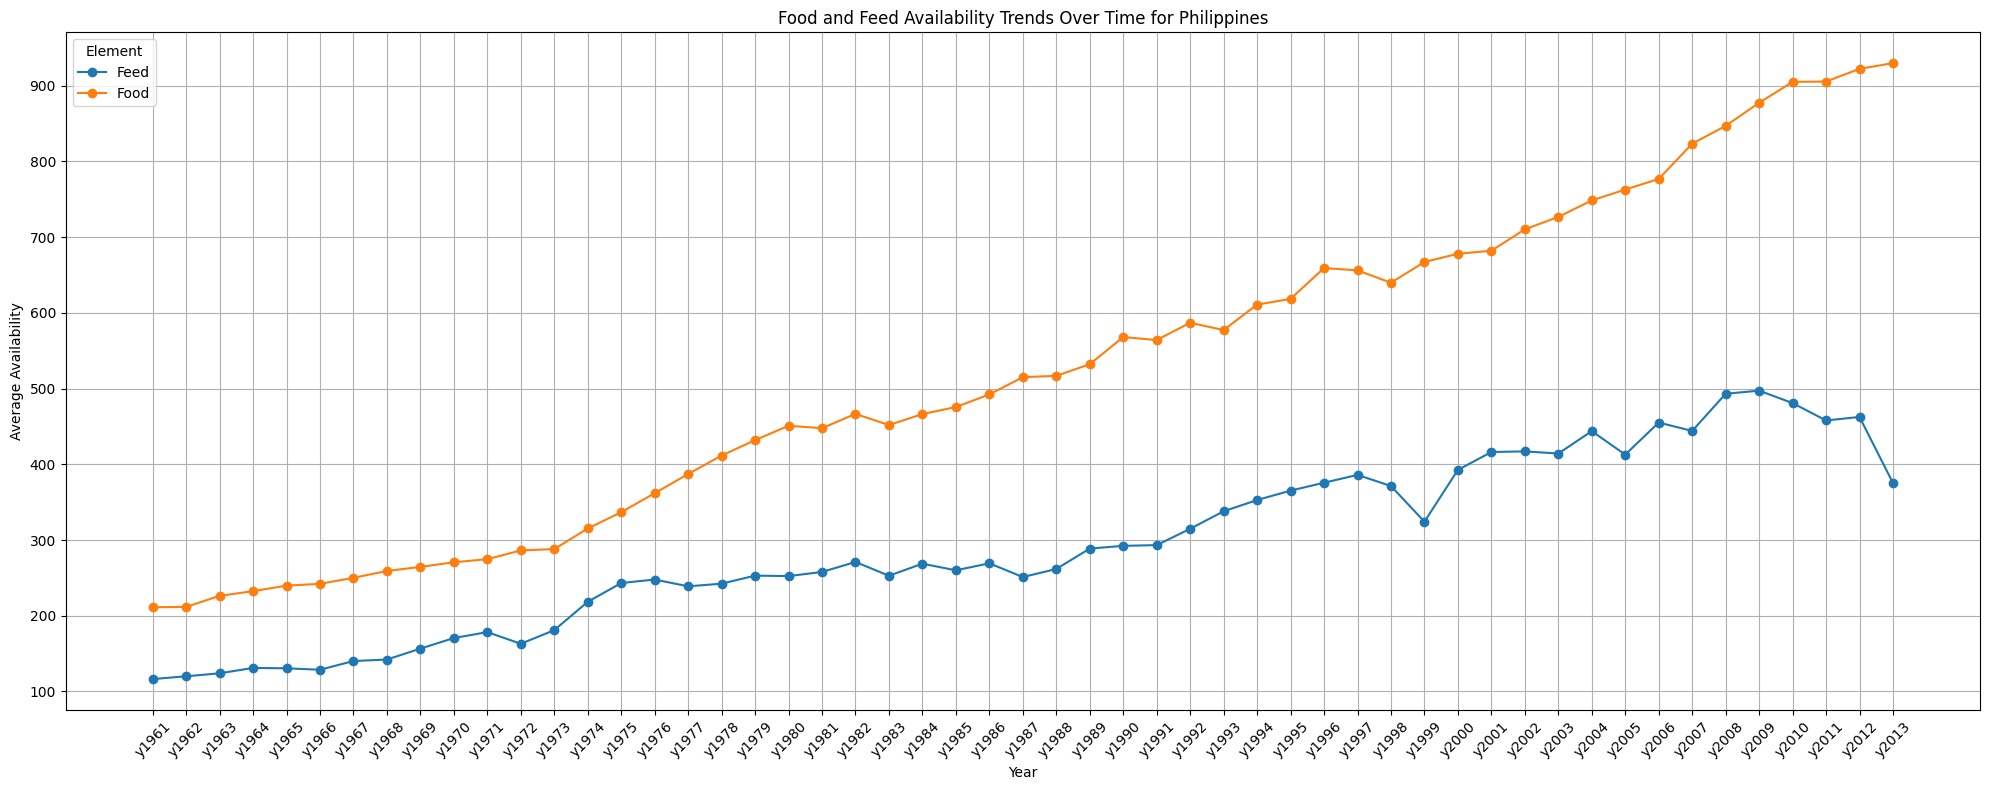

In [ ]:
# Selected country
selected_country = 'Philippines'

# Filter data for the selected country
country_data = grouped_df[grouped_df['area'] == selected_country]

plt.figure(figsize=(20, 8))

# Plot each element's data over the years
for element in country_data['element'].unique():
        element_data = country_data[country_data['element'] == element]
        plt.plot(year_columns, element_data[year_columns].values.flatten(), marker='o', label=element)

# Customize plot
plt.title(f'Food and Feed Availability Trends Over Time for {selected_country}')
plt.xlabel('Year')
plt.ylabel('Average Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Element')
plt.tight_layout()
plt.show()

                         item  AverageValue
16   Cereals - Excluding Beer   8266.886792
77   Rice (Milled Equivalent)   6061.698113
34    Fruits - Excluding Wine   5968.528302
101                Vegetables   3856.188679
102         Vegetables, Other   3636.000000
35              Fruits, Other   3176.396226
86              Starchy Roots   2121.075472
6                     Bananas   2091.018868
32              Fish, Seafood   1919.622642
88         Sugar & Sweeteners   1465.528302


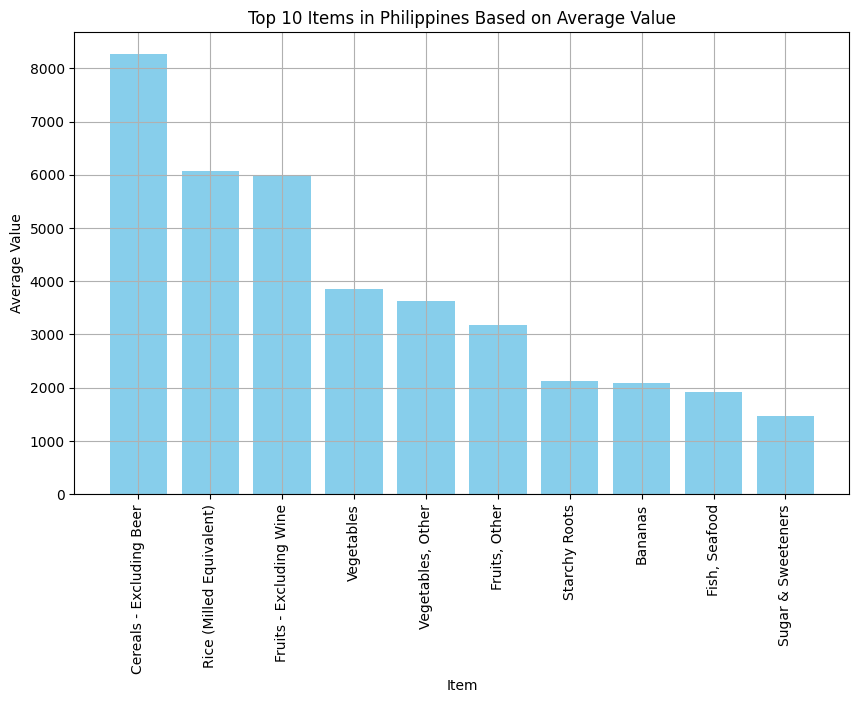

In [ ]:
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])
fao_top = fao_top[fao_top['element'] != 'Feed']
country = 'Philippines'


df_country = fao_top[fao_top['area'] == country]
year_columns = [col for col in df_country.columns if col.startswith('y')]

df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

df_average = df_melted.groupby('item')['Value'].mean().reset_index()

df_average = df_average.rename(columns={'Value': 'AverageValue'})

df_top10 = df_average.sort_values(by='AverageValue', ascending=False).head(10)

print(df_top10)

plt.figure(figsize=(10, 6))
plt.bar(df_top10['item'], df_top10['AverageValue'], color='skyblue')
plt.title(f'Top 10 Items in {country} Based on Average Value')
plt.xlabel('Item')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

The bar graph of the top 10 products of the Philippines, based on their average, shows that the country can generate supply to feed the Filipinos. The trend line also shows the growing production of crops, fruits, Meat, and Fish. The products indicate that the Philippines is self-sufficient and could achieve food security. However, the food and feed availability trends in the Philippines show that feed production is much greater than food production. The combined analysis could indicate that the exports in the Philippines are more significant, and food security relies on importing other products. The discussion paper of Tionco and Francisco (2011) also states that the country's rice self-sufficiency ratio is high; however, the Philippines still relies on imports. Their study also shows that the Balance of Trade line graph is lower than 0 from 1990 to 2009.

Francisco, Kris A. (2011) Philippines: Food Security versus Agricultural Exports?, Https://Pidswebs.Pids.Gov.Ph/CDN/PUBLICATIONS/Pidsdps1135.Pdf


In [ ]:
# The Growth Rate of Feed per Country and its corresponding item

food_df = growth_df[merged_df['element'] == 'Food'].copy()

# Print the top 10 rows for 'Food' element
print("Top 10 Rows for 'Food' Element:")
food_df.head(10)

Top 10 Rows for 'Food' Element:


area  area_code                      item  Growth_y1962  \
0   Afghanistan          2        Wheat and products         -1.24   
1   Afghanistan          2  Rice (Milled Equivalent)          0.00   
3   Afghanistan          2       Barley and products          0.00   
5   Afghanistan          2        Maize and products          0.00   
6   Afghanistan          2       Millet and products          5.88   
7   Afghanistan          2            Cereals, Other           NaN   
8   Afghanistan          2     Potatoes and products        -12.61   
11  Afghanistan          2    Sugar (Raw Equivalent)         -8.89   
12  Afghanistan          2         Sweeteners, Other           NaN   
13  Afghanistan          2                     Honey          0.00   

    Growth_y1963  Growth_y1964  Growth_y1965  Growth_y1966  Growth_y1967  \
0         -12.50         17.05          2.62         -9.65         13.55   
1          -0.55         20.88          0.00        -11.36         18.46   
3           0.00          0.42          0.00         -0.42         -5.06   
5           1.74          1.22          0.00         -0.48          9.93   
6           5.56          5.26          5.00          4.76          4.55   
7            NaN           NaN           NaN           NaN           NaN   
8           6.19          6.80          2.73          3.54          9.40   
11          4.88         20.93          5.77          5.45          6.90   
12           NaN           NaN           NaN           NaN           NaN   
13          0.00          0.00         50.00          0.00          0.00   

    Growth_y1968  ...  Growth_y2004  Growth_y2005  Growth_y2006  Growth_y2007  \
0          -0.39  ...          4.98          7.29          6.25         12.42   
1           1.73  ...         -8.91          6.21         22.70        -16.67   
3           0.89  ...         28.47        -76.76          2.33          9.09   
5          -1.32  ...         97.44        -71.00         22.39        -18.29   
6           4.35  ...         -6.25         40.00        -47.62         72.73   
7            NaN  ...        100.00        -50.00          0.00       -100.00   
8           1.56  ...        -20.46          6.52          0.00        -11.56   
11          4.84  ...         34.78         22.58         11.18         13.61   
12           NaN  ...         50.00         66.67        -20.00        -50.00   
13          0.00  ...        -40.00          0.00          0.00          0.00   

    Growth_y2008  Growth_y2009  Growth_y2010  Growth_y2011  Growth_y2012  \
0           2.11          6.73          1.48          2.30          2.10   
1           7.69        -15.31          6.51          7.69        -10.71   
3          29.17        -11.29          9.09         20.00          8.33   
5           2.99          2.90         15.49        -10.98          5.48   
6          10.53        -14.29        -22.22          0.00          0.00   
7            NaN           NaN           NaN           NaN           NaN   
8          -6.92          3.31        -23.20        -11.98         15.98   
11         13.02          6.45          3.90          0.00          4.17   
12         83.33        -81.82        350.00        133.33         14.29   
13          0.00          0.00          0.00        -33.33          0.00   

    Growth_y2013  
0           1.77  
1          -0.71  
3          14.10  
5          -1.30  
6         -14.29  
7            NaN  
8          17.35  
11          2.00  
12        -33.33  
13          0.00  

[10 rows x 55 columns]

### 2.3 Correlation Analysis

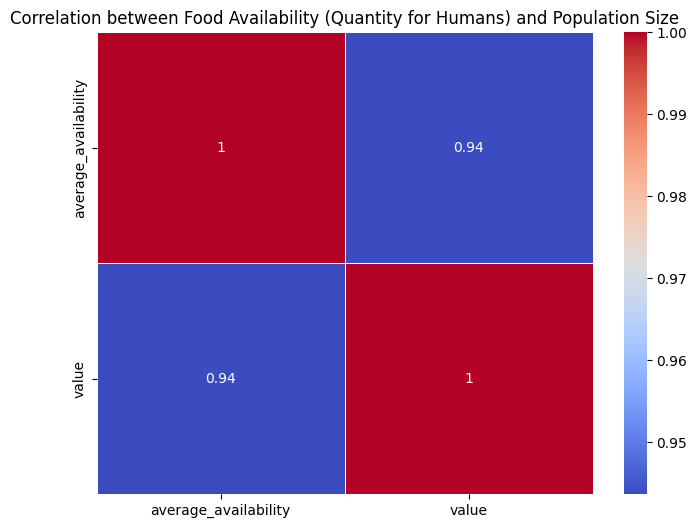

In [ ]:
merged_df_corr = pd.merge(fao, faostat, on='area_code', how='inner')
year_columns_corr = [col for col in merged_df_corr.columns if col.startswith(('y1', 'y2'))]
merged_df_corr['average_availability'] = merged_df_corr[year_columns_corr].mean(axis=1)

food_df = merged_df_corr[merged_df['element'] == 'Food']

# Group by Unique 'Area' and aggregate food availability and population for each country
food_corr_df = food_df.groupby('area_x').agg({'average_availability': 'sum', 'value': 'mean'})

# Compute correlation matrix
correlation = food_corr_df.corr()

# Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Food Availability (Quantity for Humans) and Population Size')
plt.show()


The correlation between food availability and population size is 0.94 which indicates a strong positive correlation. This implies that as the population size increases, the availability of food for human consumption also tends to increase.

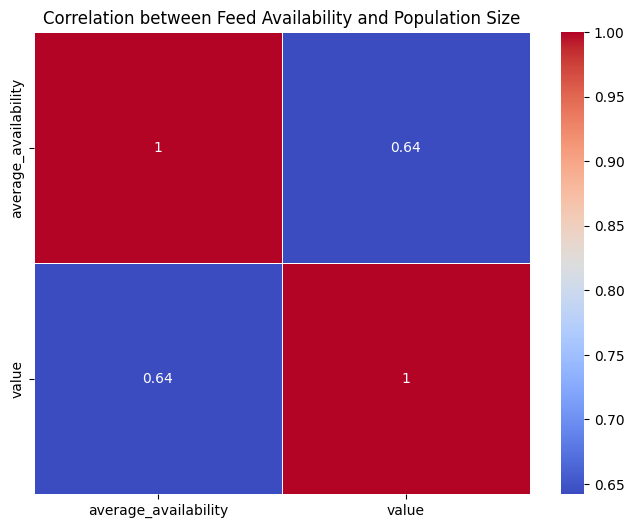

In [ ]:
feed_df = merged_df_corr[merged_df['element'] == 'Feed']

# Step 3: Calculate the correlation between 'Years' (food quantity) and 'Population_2017'
# Group by Unique 'Area' and aggregate food availability and population for each country
feed_corr_df = feed_df.groupby('area_x').agg({'average_availability': 'sum', 'value': 'mean'})

# Compute correlation matrix
correlation = feed_corr_df.corr()
# Step 4: Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Feed Availability and Population Size')
plt.show()


The correlation between feed availability and population size is 0.64, which also indicates a strong positive correlation. This implies that as the population size increases, the availability of feed for livestock tends to increase. This relationship suggests that the demand for feed rises with a growing population, likely to support increased livestock production for food.

# Task 3: Data Visualization

### 3.1 Bar Graphs

## Top 10 items per region in 2013

The graphs display the top five food items in various continents for 2013. In Africa, cereals dominate, with sugar cane and milk also prominent, indicating a diet reliant on staple grains and sugar, which could contribute to nutritional deficiencies. Asia shows a heavy reliance on cereals, followed by vegetables and milk, reflecting a rice-based diet with moderate dairy intake, which could lead to a well-balanced diet if diverse vegetables are included. Europe and North America both feature milk and cereals prominently, along with higher consumption of meats, suggesting diets rich in protein but potentially high in saturated fats, raising concerns about heart health. Oceania, similar to Europe, emphasizes milk and cereals, with notable meat consumption, possibly reflecting cultural preferences for dairy and meat but also posing risks of dietary imbalances. South America’s focus on cereals, milk, and fruits suggests a more balanced diet, though lower meat consumption might reflect economic constraints rather than cultural preferences.ems.

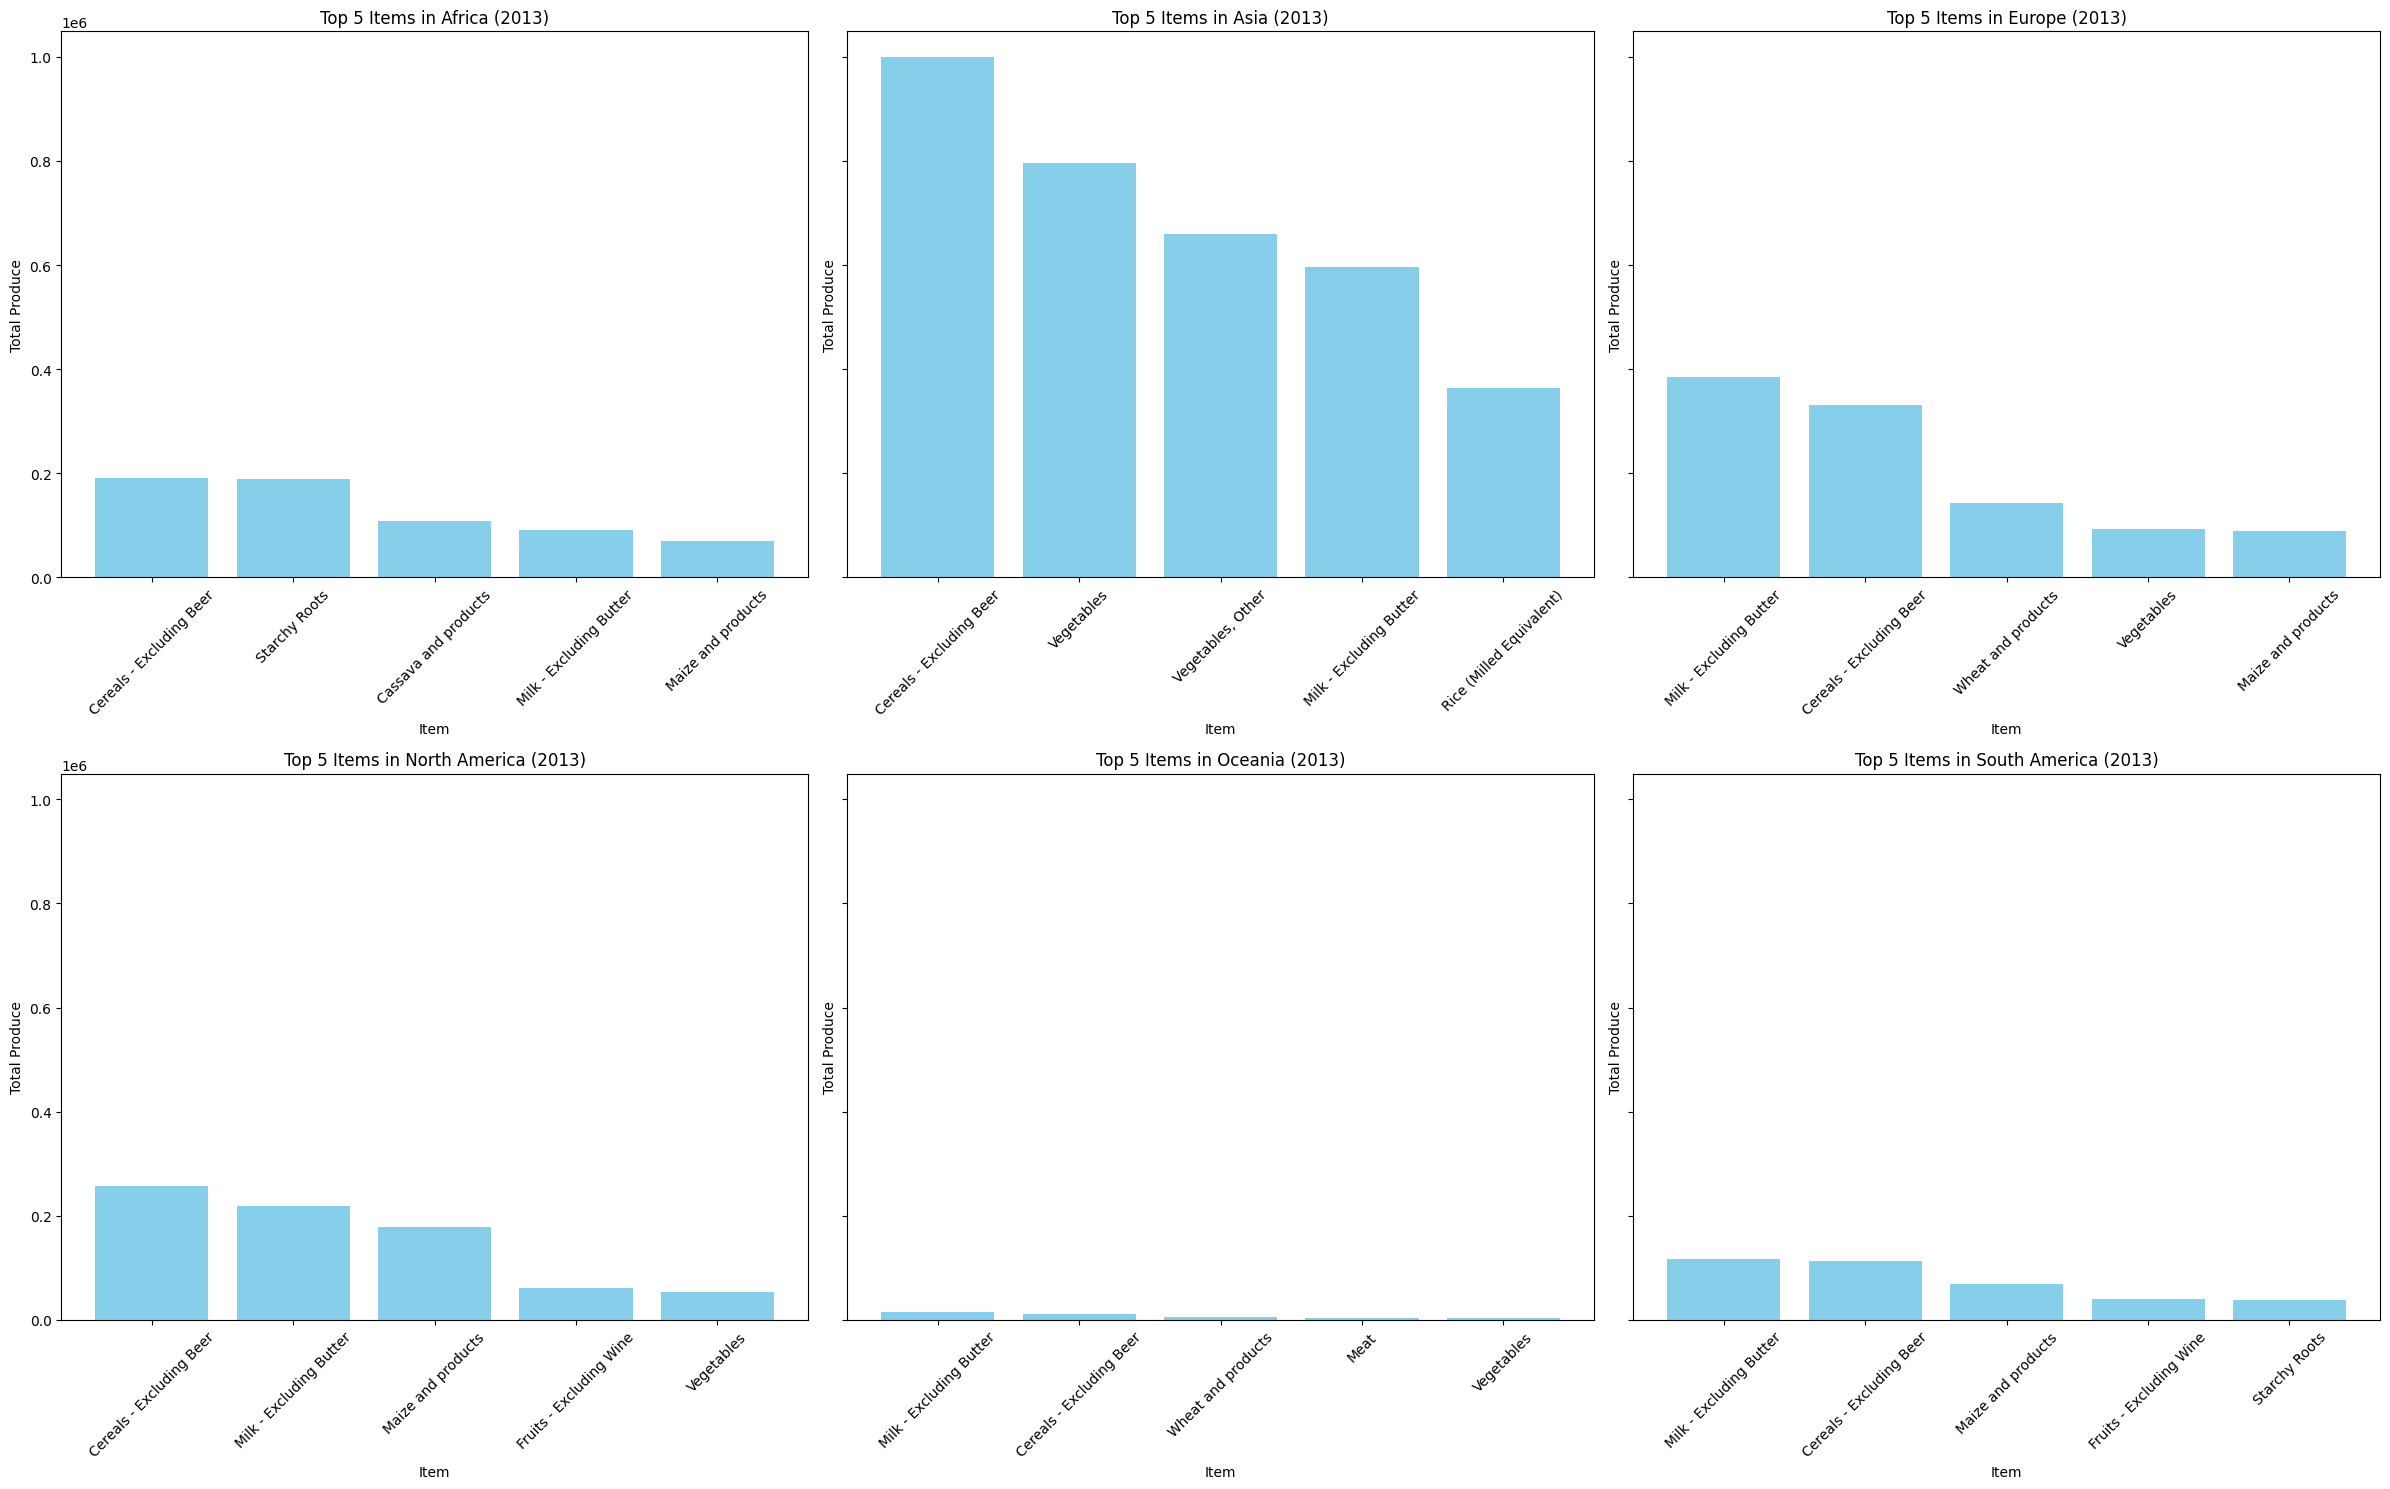

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded into merged_df
# Example: merged_df = pd.read_csv('your_file.csv')

# Group by region and item, then sum the 'y2013' values
grouped_df = merged_df.groupby(['region', 'item']).sum().reset_index()

# Get the top 5 items per continent (region)
top_items_per_region = grouped_df.groupby('region').apply(lambda x: x.nlargest(5, 'y2013')).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(24, 15), sharey=True)
axes = axes.flatten()

for i, region in enumerate(top_items_per_region['region'].unique()):
    region_data = top_items_per_region[top_items_per_region['region'] == region]
    axes[i].bar(region_data['item'], region_data['y2013'], color='skyblue')
    axes[i].set_title(f'Top 5 Items in {region} (2013)')
    axes[i].set_xlabel('Item')
    axes[i].set_ylabel('Total Produce')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

## Bar Graphs displaying the top 10 items globally, along with the top 5 countries that possess them.
The global food production landscape is characterized by the dominance of a few key players, particularly the United States, India, and China. The United States stands out in various high-calorie food categories, such as milk, cereals, meat, and alcoholic beverages, underscoring its significant role in global agriculture, especially in livestock and staple crop production. China and India are also prominent, with China leading in cereals, vegetables, and starchy roots, and India excelling in cereals and milk production. The substantial production in these populous nations largely serves domestic consumption, highlighting their agricultural capacity but also their reliance on internal demand.

Region-specific specializations are evident, with China focusing on staple food items, India on cereals and milk, and the United States on a diverse agricultural base, including meat and alcoholic beverages. European countries like France and Germany show strength in milk, cereals, and alcoholic beverages, reflecting their agricultural traditions. Emerging markets such as Brazil and Indonesia are gaining prominence in cereals, fruits, and starchy roots, with Brazil also becoming a major meat exporter.

The dominance of certain countries in specific food categories raises concerns about global food security, trade dependencies, and environmental sustainability. The reliance on a few nations for critical food supplies makes the global food system vulnerable to disruptions from geopolitical instability, natural disasters, or trade disputes. Additionally, the environmental impact of high livestock production in countries like the United States and Brazil underscores the need for sustainable agricultural practices.

To address these challenges, diversification of supply sources, investment in emerging markets, and innovation in agricultural practices are recommended. This includes enhancing infrastructure and technology in countries like Brazil and Indonesia, promoting sustainable farming methods, and encouraging agricultural diversification to reduce economic risks. Furthermore, the potential effects of climate change and geopolitical tensions on food production necessitate proactive strategies to maintain global food security and supply chain stability.

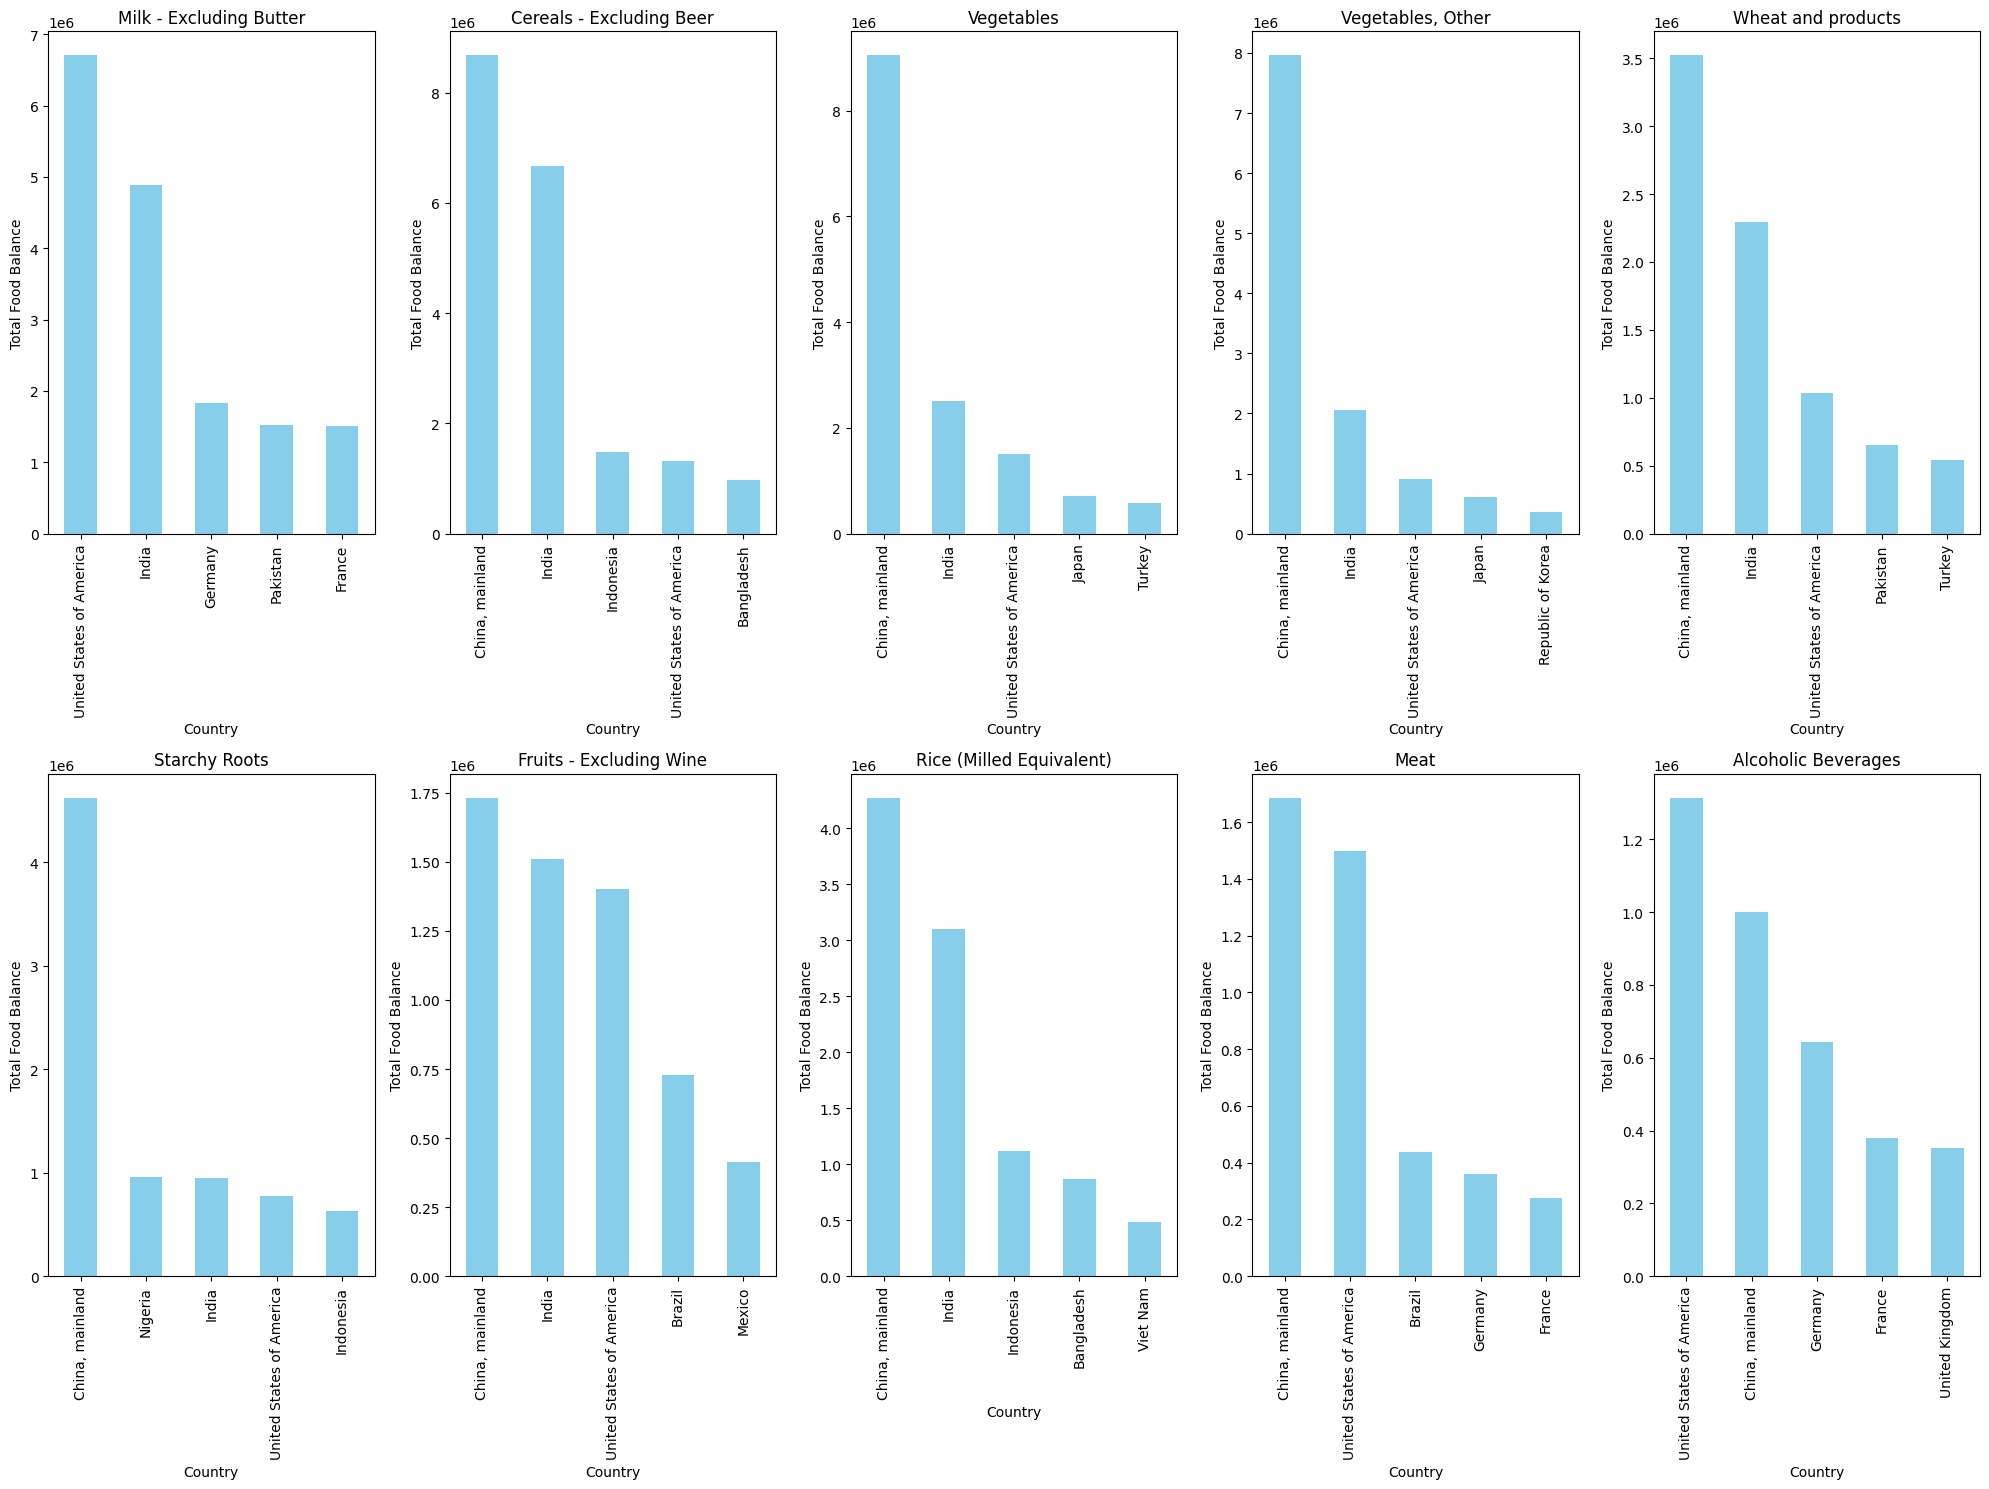

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food']

# Step 2: Sum the food balance across all years for each country and item
food_balance_sum = df_food.groupby(['area', 'item']).sum().loc[:, 'y1961':'y2013'].sum(axis=1)

# Step 3: Sum the food balance globally by item
global_food_balance = food_balance_sum.groupby('item').sum()

# Step 4: Find the top 10 most exported items
top_10_items = global_food_balance.sort_values(ascending=False).head(10).index

# Step 5: For each top item, find the top 5 countries
top_5_countries_per_item = {}
for item in top_10_items:
    top_5_countries_per_item[item] = food_balance_sum.loc[pd.IndexSlice[:, item]].sort_values(ascending=False).head(5)

# Step 6: Plot the bar graphs
plt.figure(figsize=(20, 15))
for i, (item, top_5) in enumerate(top_5_countries_per_item.items(), start=1):
    plt.subplot(2, 5, i)
    top_5.plot(kind='bar', title=item, color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Total Food Balance')

plt.tight_layout()
plt.show()

## Bar Graphs displaying the bottom 10 items globally, along with the top 5 countries that possess them.
In contrast to the top 10 globally traded food items, which are dominated by major exporters like the United States, China, and India, the bottom 10 items showcase a more diverse range of exporters. This diversity suggests that smaller or specialized markets are spread out more globally, often reflecting specific geographic or climatic advantages. For instance, items like cloves, palm kernels, and fish liver oil are primarily exported by countries with suitable climates or access to particular natural resources, such as Madagascar and Indonesia for cloves, and the Central African Republic and Ghana for palm kernels.

These bottom-tier items are typically niche or low-calorie products, such as meat from aquatic mammals, fish liver oil, and cottonseed. Their specialized nature and limited global demand result in smaller, more focused markets compared to staple foods like cereals or meats. The export volumes for these items are significantly lower, underscoring their niche status and relatively lower demand in the global market. This is particularly evident in the negligible global food balance for items like meat from aquatic mammals, especially when compared to high-demand staples.

Developing nations often play a significant role in exporting these niche items, finding economic opportunities by focusing on products indigenous to their regions or requiring specific climatic conditions. The implications of this trend include opportunities for these countries to enhance the quality and marketing of their products to expand their niche markets globally. They could benefit from certifications like organic or fair trade to appeal to specific consumer bases.

Given the environmental impact associated with the production of some of these items, particularly animal-related products, there is a need for exporting countries to invest in sustainable practices to ensure the long-term viability of these industries. Moreover, countries that rely heavily on a few niche items may benefit from diversifying their agricultural exports to mitigate risks associated with market volatility or shifts in global demand.

The impacts of climate change also pose a significant threat to these specialized products, given their dependence on specific environmental conditions. Exporters should invest in research and development to adapt to these changes and safeguard their agricultural outputs. Additionally, developing value-added products, such as processing raw palm kernels or cloves into oils or extracts, could enhance the economic value of exports, allowing countries to fetch higher prices on the international market.

However, it is crucial to consider the accuracy of the data used in this analysis, as small discrepancies could significantly affect the perceived market dominance of these countries. Furthermore, economic and policy shifts, changes in domestic policies, international trade agreements, or fluctuations in global demand could greatly impact these niche markets, making them more volatile and sensitive compared to staple commodities.

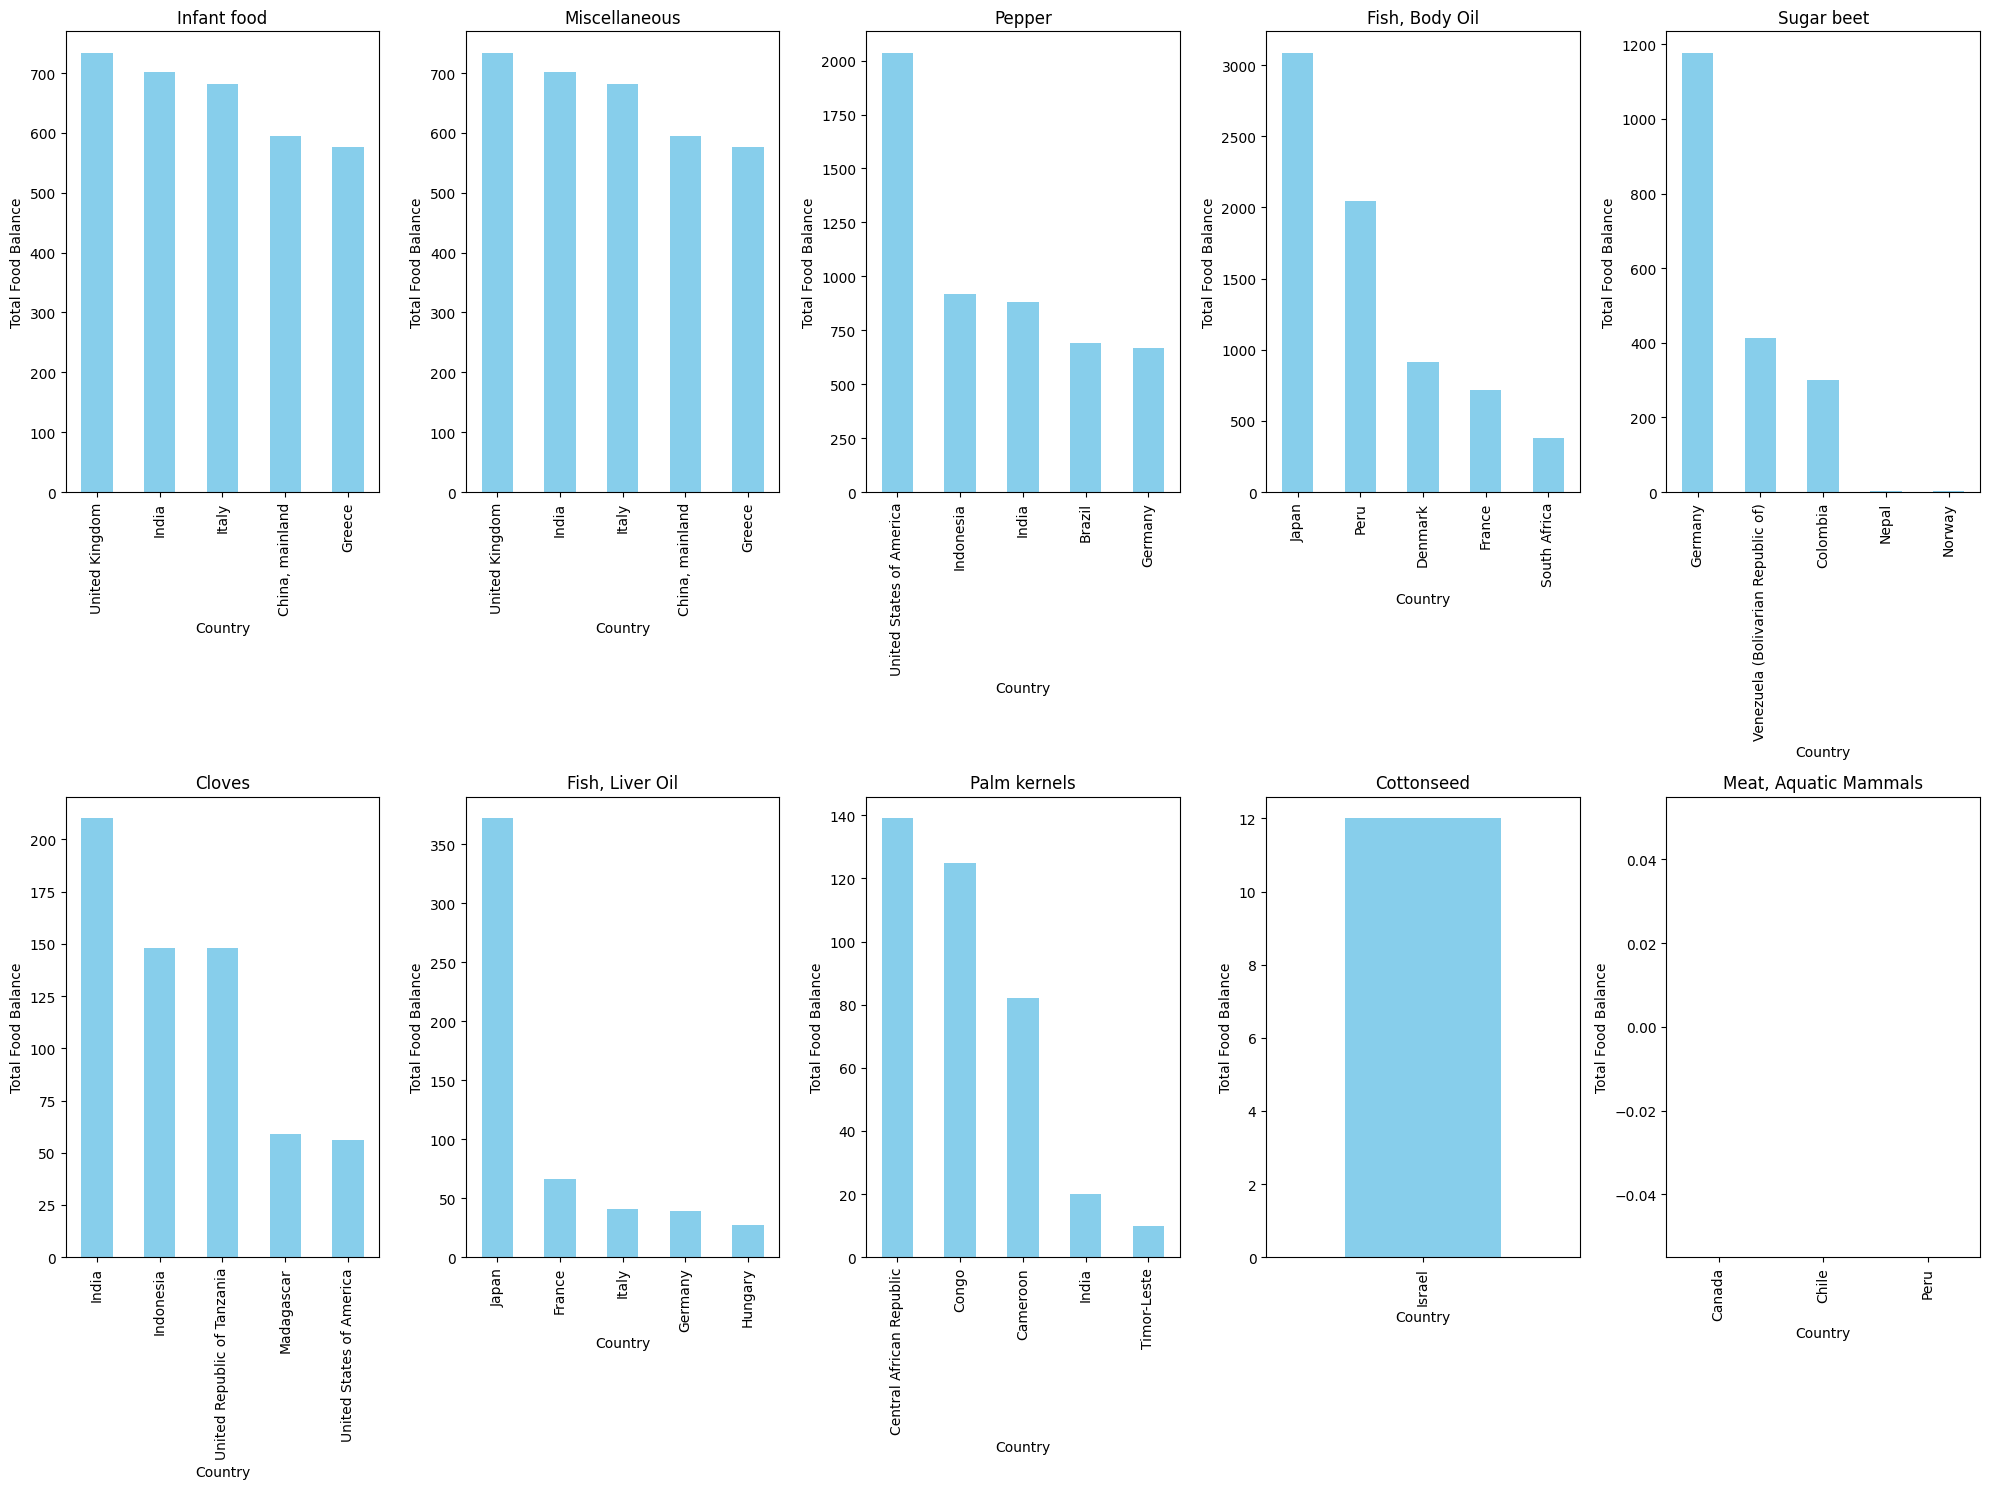

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called df

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food']

# Step 2: Sum the food balance across all years for each country and item
food_balance_sum = df_food.groupby(['area', 'item']).sum().loc[:, 'y1961':'y2013'].sum(axis=1)

# Step 3: Sum the food balance globally by item
global_food_balance = food_balance_sum.groupby('item').sum()

# Step 4: Find the top 10 most exported items
top_10_items = global_food_balance.sort_values(ascending=False).tail(10).index

# Step 5: For each top item, find the top 5 countries
top_5_countries_per_item = {}
for item in top_10_items:
    top_5_countries_per_item[item] = food_balance_sum.loc[pd.IndexSlice[:, item]].sort_values(ascending=False).head(5)

# Step 6: Plot the bar graphs
plt.figure(figsize=(20, 15))
for i, (item, top_5) in enumerate(top_5_countries_per_item.items(), start=1):
    plt.subplot(2, 5, i)
    top_5.plot(kind='bar', title=item, color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Total Food Balance')

plt.tight_layout()
plt.show()

### 3.2 Time Graphs

## Global Food and Feed Balance Over Time
Both feed and food are linearly equal. However, observing the graph, the slow decline of feeds globally could raise concern over time to maintain global food security. It is also observed that from 1960 to 1986, the demand for food was low; therefore, the global economy could focus on the feed supply. However, over time, as the population increases, food security balance also diverges. In 1998, the United Nations stated that according to the FAO report, weather-related crop damage leads to less domestic food availability (UN, 1998). Observing the graph in the year 1995, the trend line for the feeds slowly diverged from the linear increase in food. The trendline of food availability also indicates that despite the rapid growth in the population, its linear increase might need to catch up with the demand for food.


Source:
WORLDWIDE NUMBER OF HUNGRY PEOPLE RISING AS LITTLE PROGRESS IS REGISTERED IN REDUCING POVERTY, ACCORDING TO FAO REPORT | Meetings coverage and press releases. (1998, November 27). https://press.un.org/en/1998/19981127.sag20.html

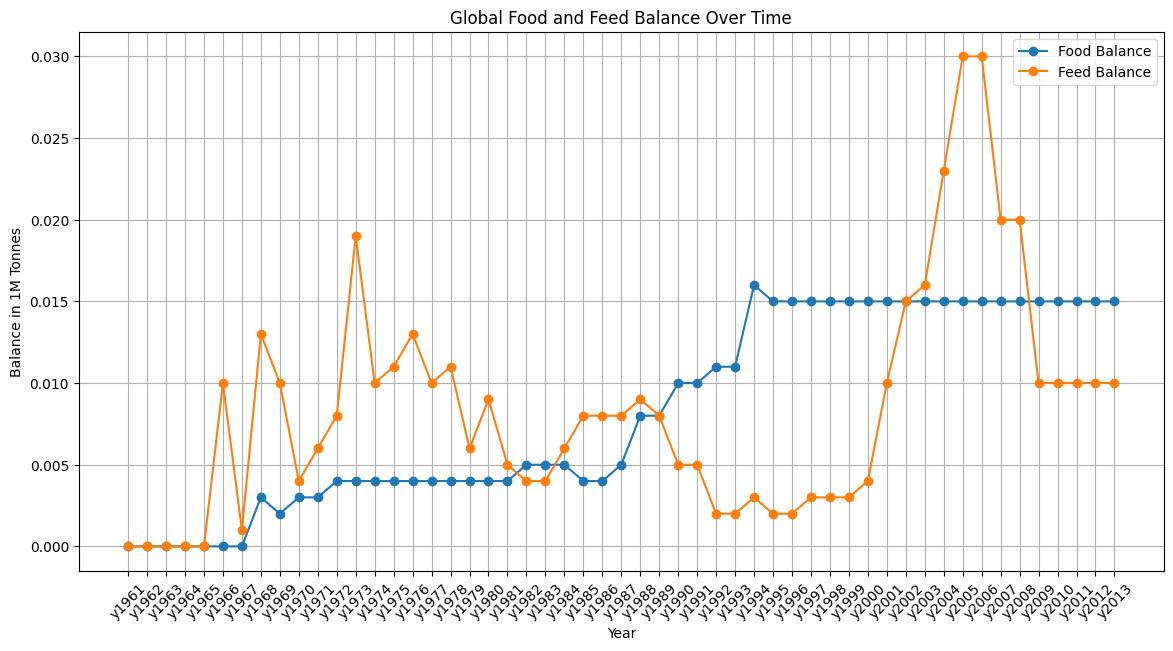

In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df

# Step 1: Filter the data for Food and Feed
df_food = grouped_df[grouped_df['element'] == 'Food']
df_feed = grouped_df[grouped_df['element'] == 'Feed']

# Step 2: Sum the values for each year for Food and Feed
food_balance = df_food.loc[:, 'y1961':'y2013'].sum()/1000
feed_balance = df_feed.loc[:, 'y1961':'y2013'].sum()/1000

# Step 3: Create the time series
food_time_series = pd.Series(food_balance, name='Food Balance')
feed_time_series = pd.Series(feed_balance, name='Feed Balance')

# Optionally, you can combine them into a single DataFrame for easier comparison
global_balance = pd.DataFrame({
    'Food Balance': food_time_series,
    'Feed Balance': feed_time_series
})

plt.figure(figsize=(14, 7))
plt.plot(global_balance.index, global_balance['Food Balance'], label='Food Balance', marker='o')
plt.plot(global_balance.index, global_balance['Feed Balance'], label='Feed Balance', marker='o')

plt.title('Global Food and Feed Balance Over Time')
plt.xlabel('Year')
plt.ylabel('Balance in 1M Tonnes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Food Balance Over 5-Year Intervals by Region
Asia has demonstrated a significant and consistent increase in food balance over the decades, peaking around 2006-2010 before experiencing a noticeable decline in the 2011-2013 period. Europe, on the other hand, showed consistent growth until the early 1990s, after which its food balance stabilized and eventually declined post-2001-2005. North America followed a similar pattern, with steady growth in food balance until the 2000s, after which it plateaued and began to decline after 2006-2010. Africa’s food balance has grown slowly but steadily, though it also saw a minor decline in the 2011-2013 period. South America and Oceania exhibited much slower growth in food balance compared to other regions, with South America slightly outperforming Oceania.

To strengthen food security in Asia, it is recommended that the region diversifies its food sources and improves agricultural productivity to counter the decline in food balance observed post-2010. Investing in infrastructure, such as enhanced storage, transportation, and distribution networks, could also help minimize food losses and ensure consistent food availability.

For Europe and North America, where food balance has declined, stronger sustainability initiatives are necessary. This includes reducing food waste, optimizing resource use in agriculture, and increasing local food production. Policy interventions by governments to support local farmers and promote sustainable agricultural practices would also be beneficial.

In Africa, boosting agricultural output is crucial. Investments in agricultural technology and infrastructure could improve yields and enhance food security. Additionally, addressing climate change through climate-resilient farming practices is vital to counter the challenges posed by environmental changes.

South America and Oceania, with their slower growth, could benefit from enhancing their food export potential by focusing on quality and establishing trade partnerships. Increasing domestic agricultural production could also help these regions improve their food balance and reduce reliance on imports.

Several factors may explain these trends. Asia's rapid economic growth likely drove the initial increase in food balance, but the recent decline could be due to increased consumption or export pressures. Population dynamics, particularly in Asia and Africa, have likely increased demand, putting pressure on food balance. Changes in global trade policies and agreements may have also impacted food balance, especially in Europe and North America. Additionally, climate change may have adversely affected agricultural productivity, particularly in Asia and Africa, influencing these trends.

To address these issues, regions should implement robust food security plans that account for potential climate change impacts and economic fluctuations. Encouraging sustainable agricultural practices is essential for ensuring long-term food availability. Monitoring population growth and managing it in line with food production capacities will help avoid potential shortages. Lastly, enhancing global cooperation and trade could stabilize food balances across regions, allowing food surpluses in one region to support deficits in another.

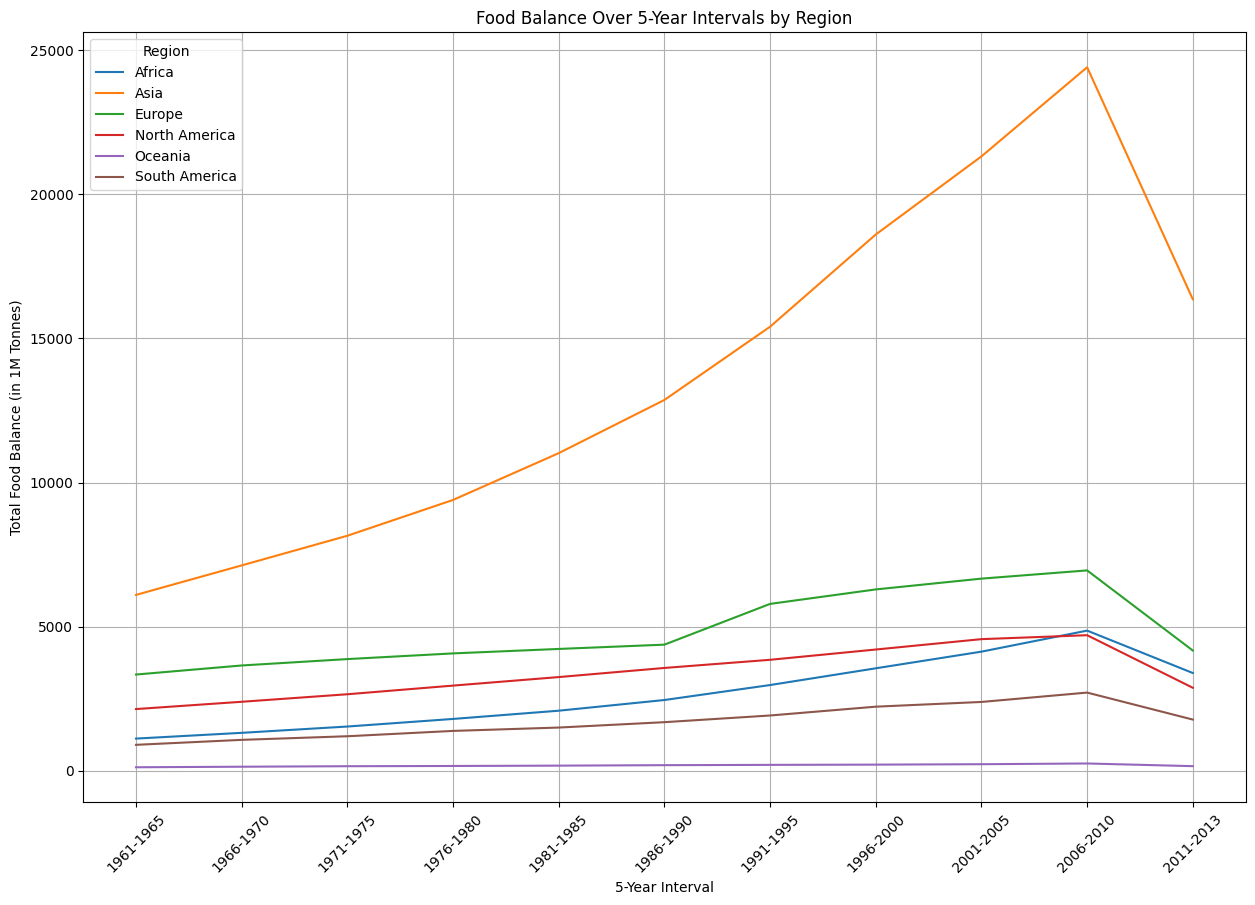

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food'].copy()  # Use .copy() to avoid modifying the original DataFrame

# Step 2: Aggregate the data in 5-year intervals
# Define the 5-year intervals
intervals = {
    '1961-1965': ['y1961', 'y1962', 'y1963', 'y1964', 'y1965'],
    '1966-1970': ['y1966', 'y1967', 'y1968', 'y1969', 'y1970'],
    '1971-1975': ['y1971', 'y1972', 'y1973', 'y1974', 'y1975'],
    '1976-1980': ['y1976', 'y1977', 'y1978', 'y1979', 'y1980'],
    '1981-1985': ['y1981', 'y1982', 'y1983', 'y1984', 'y1985'],
    '1986-1990': ['y1986', 'y1987', 'y1988', 'y1989', 'y1990'],
    '1991-1995': ['y1991', 'y1992', 'y1993', 'y1994', 'y1995'],
    '1996-2000': ['y1996', 'y1997', 'y1998', 'y1999', 'y2000'],
    '2001-2005': ['y2001', 'y2002', 'y2003', 'y2004', 'y2005'],
    '2006-2010': ['y2006', 'y2007', 'y2008', 'y2009', 'y2010'],
    '2011-2013': ['y2011', 'y2012', 'y2013'],  # Last interval with 3 years only
}

# Step 2.1: Create new columns for each interval, summing the respective years
for interval, years in intervals.items():
    df_food.loc[:, interval] = df_food.loc[:, years].sum(axis=1)/1000

# Step 3: Aggregate by region and interval
# We need to aggregate based on these new interval columns
region_time_series = df_food.groupby('region')[list(intervals.keys())].sum()

# Step 4: Plot the time series for each region
plt.figure(figsize=(15, 10))
for region in region_time_series.index:
    plt.plot(region_time_series.columns, region_time_series.loc[region], label=region)

plt.title('Food Balance Over 5-Year Intervals by Region')
plt.xlabel('5-Year Interval')
plt.ylabel('Total Food Balance (in 1M Tonnes)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Feed Balance per Region

The graph illustrates the total feed balance across various regions over 5-year intervals, with a notable consideration that the final time span, from 2011 to 2013, represents only three years. Asia and Europe initially show a significant increase in feed balance, with Asia peaking during the 2006-2011 period before a marked decline in the shorter 2011-2013 interval. Europe's feed balance also rises until the early 1990s, followed by stabilization and a decrease after 2001-2005. North America mirrors this trend, growing steadily up to the 2000s before plateauing and declining post-2006. South America's feed balance shows continuous growth, peaking in 2001-2005, then experiencing a slight decline. Africa demonstrates steady growth with a minor drop in the 2010-2013 period, while Oceania, with the lowest overall feed balance, shows minimal growth over time.

These trends are likely influenced by a mix of agricultural intensificatios, economic factors, and environmental pressures. Asia's peak and subsequent decline, particularly in the 2110-2013 period,ight be temporary as the production might spike in the next 2 yearsesIf it is not, however, e

Economically, these feed balance trends could have significant implications. Asia's decline might signal a future need for increased imports, affecting global markets. Europe's and North America's declines could influence livestock production and food prices, while South America's stable growth may position it as a key player in global feed markets. Africa's continued growth is vital for its food security, but it remains susceptible to shocks. Oceania's limited feed production may require increased trade to meet regional demands.

Recommendations include diversifying feed sources, investing in sustainable agricultural practices, and enhancing infrastructure for storage and distribution. Asia, Europe, and North America should focus on sustainability and efficiency, while South America and Oceania could benefit from expanding production and trade partnerships. Africa should continue investing in agricultural technology and climate adaptation strategies. Global cooperation and trade will be essential in addressing regional disparities and ensuring food security.

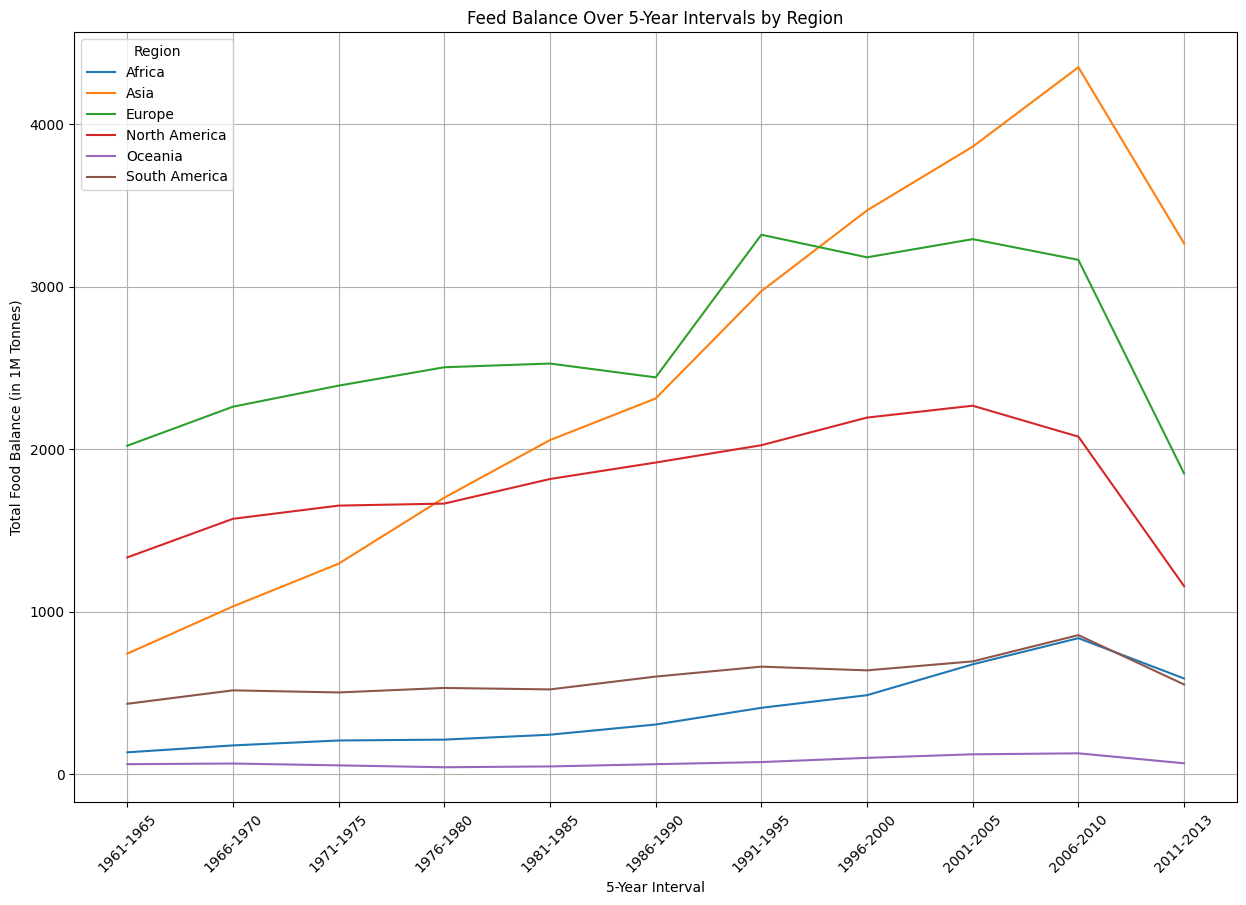

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Feed'].copy()  # Use .copy() to avoid modifying the original DataFrame

# Step 2: Aggregate the data in 5-year intervals
# Define the 5-year intervals
intervals = {
    '1961-1965': ['y1961', 'y1962', 'y1963', 'y1964', 'y1965'],
    '1966-1970': ['y1966', 'y1967', 'y1968', 'y1969', 'y1970'],
    '1971-1975': ['y1971', 'y1972', 'y1973', 'y1974', 'y1975'],
    '1976-1980': ['y1976', 'y1977', 'y1978', 'y1979', 'y1980'],
    '1981-1985': ['y1981', 'y1982', 'y1983', 'y1984', 'y1985'],
    '1986-1990': ['y1986', 'y1987', 'y1988', 'y1989', 'y1990'],
    '1991-1995': ['y1991', 'y1992', 'y1993', 'y1994', 'y1995'],
    '1996-2000': ['y1996', 'y1997', 'y1998', 'y1999', 'y2000'],
    '2001-2005': ['y2001', 'y2002', 'y2003', 'y2004', 'y2005'],
    '2006-2010': ['y2006', 'y2007', 'y2008', 'y2009', 'y2010'],
    '2011-2013': ['y2011', 'y2012', 'y2013'],  # Last interval with 3 years only
}

# Step 2.1: Create new columns for each interval, summing the respective years
for interval, years in intervals.items():
    df_food.loc[:, interval] = df_food.loc[:, years].sum(axis=1)/1000

# Step 3: Aggregate by region and interval
# We need to aggregate based on these new interval columns
region_time_series = df_food.groupby('region')[list(intervals.keys())].sum()

# Step 4: Plot the time series for each region
plt.figure(figsize=(15, 10))
for region in region_time_series.index:
    plt.plot(region_time_series.columns, region_time_series.loc[region], label=region)

plt.title('Feed Balance Over 5-Year Intervals by Region')
plt.xlabel('5-Year Interval')
plt.ylabel('Total Food Balance (in 1M Tonnes)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Food Balance per Capita
Europe and North America lead the world in food balance per capita, with their highest levels recorded around 2006-2010. Despite a decline in absolute food balance, these regions maintain strong food security on an individual level, although the drop after 2010 suggests potential challenges in sustaining this availability, possibly due to declining production, demographic changes, or economic factors.

Oceania presents an interesting case, showing a relatively high per capita food balance despite having a lower total food balance. This suggests that a smaller population allows for greater food availability per person. In contrast, Asia, despite having a high total food balance, has significantly lower food balance per capita due to its large population. The sharp decline in Asia’s per capita food balance after 2006-2010 highlights potential challenges in maintaining individual food security.

Africa and South America have shown consistent growth in food balance per capita. However, Africa still lags behind other regions, which corresponds with its slower growth in total food balance and indicates ongoing food security challenges. South America, despite lower total food balance, shows better growth in per capita availability, suggesting improvements in food distribution or less pressure from population growth.

These observations validate the need for sustainability initiatives in Europe and North America, as the decline in per capita food balance after 2010 confirms the importance of addressing agricultural productivity, demographic shifts, and sustainable practices. In Asia, the low per capita food balance reinforces the need for improving food distribution and managing population pressures to ensure food security at the individual level. Oceania’s performance suggests that while enhancing export potential and increasing domestic production are important, the region’s per capita food availability is already relatively strong. Africa’s increasing per capita food balance supports the recommendation to accelerate investments in agricultural productivity and infrastructure to address ongoing food security issues.

Final recommendations include focusing on population control in regions like Asia and Africa, where population growth significantly impacts per capita food availability. Strengthening agricultural practices in Europe and North America is essential to prevent further declines in food balance. Addressing regional disparities in food balance per capita is also crucial, with targeted interventions needed in regions like Africa and South America. Additionally, monitoring global trade impacts is important to ensure that changes in the trade environment do not disproportionately affect the food security of regions with lower per capita food balance.

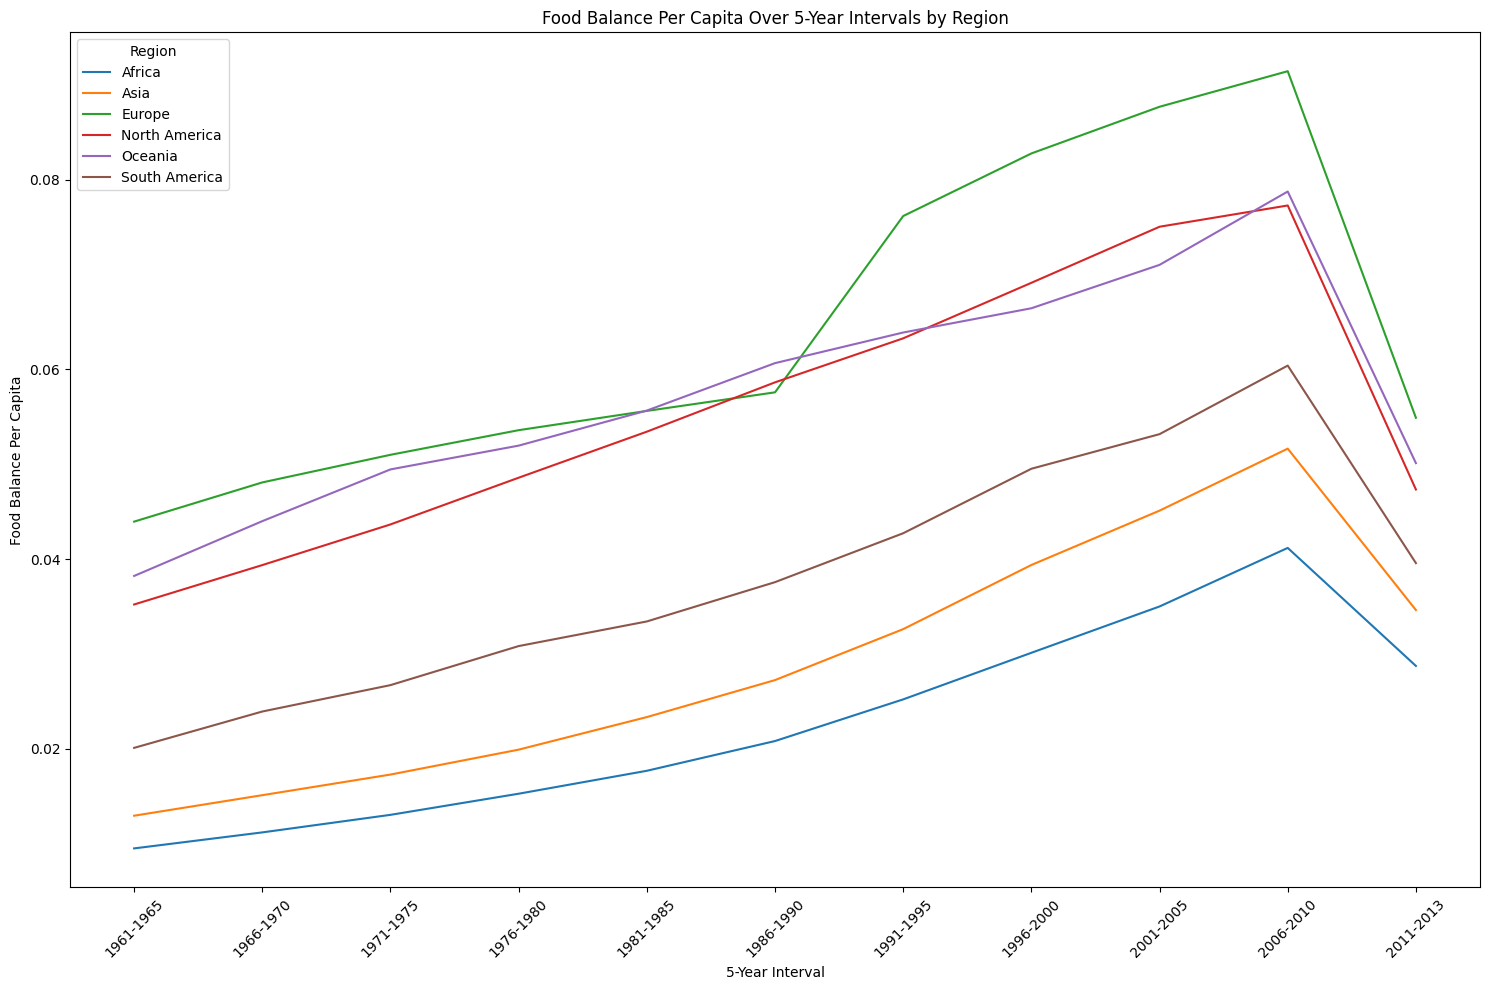

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food'].copy()  # Use .copy() to avoid modifying the original DataFrame

# Step 2: Aggregate the data in 5-year intervals
# Define the 5-year intervals
intervals = {
    '1961-1965': ['y1961', 'y1962', 'y1963', 'y1964', 'y1965'],
    '1966-1970': ['y1966', 'y1967', 'y1968', 'y1969', 'y1970'],
    '1971-1975': ['y1971', 'y1972', 'y1973', 'y1974', 'y1975'],
    '1976-1980': ['y1976', 'y1977', 'y1978', 'y1979', 'y1980'],
    '1981-1985': ['y1981', 'y1982', 'y1983', 'y1984', 'y1985'],
    '1986-1990': ['y1986', 'y1987', 'y1988', 'y1989', 'y1990'],
    '1991-1995': ['y1991', 'y1992', 'y1993', 'y1994', 'y1995'],
    '1996-2000': ['y1996', 'y1997', 'y1998', 'y1999', 'y2000'],
    '2001-2005': ['y2001', 'y2002', 'y2003', 'y2004', 'y2005'],
    '2006-2010': ['y2006', 'y2007', 'y2008', 'y2009', 'y2010'],
    '2011-2013': ['y2011', 'y2012', 'y2013'],  # Last interval with 3 years only
}

# Step 2.1: Create new columns for each interval, summing the respective years
for interval, years in intervals.items():
    df_food.loc[:, interval] = df_food.loc[:, years].sum(axis=1)

# Step 3: Aggregate food balance and population by region and interval
# Group by region and aggregate the data
region_food_balance = df_food.groupby('region')[list(intervals.keys())].sum()

# Step 4: Aggregate the population by region (assuming population_in_2017 exists)
region_population = df_food.groupby('region')['population_in_2017'].sum()

# Step 5: Divide the total food balance by the total population
region_food_per_capita = region_food_balance.div(region_population, axis=0)

# Step 6: Plot the time series for each region
plt.figure(figsize=(15, 10))
for region in region_food_per_capita.index:
    plt.plot(region_food_per_capita.columns, region_food_per_capita.loc[region], label=region)

plt.title('Food Balance Per Capita Over 5-Year Intervals by Region')
plt.xlabel('5-Year Interval')
plt.ylabel('Food Balance Per Capita')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 5 countries with the highest amount of food balance, does it predict their diet?

The graphs indicate that the top agricultural products for these countries reflect their key dietary staples. In China and India, cereals like rice and vegetables are dominant, aligning with their rice-based diets and a strong emphasis on vegetable consumption. The U.S. shows a steady demand for milk, vegetables, and meats, reflecting its diet that heavily incorporates dairy and animal products. Brazil’s focus on milk and cereals, alongside fruits, highlights a diet rich in dairy and staple crops. Germany's emphasis on milk and beer corresponds with its dairy-rich diet and strong beer culture. These trends underline the importance of these products in the national diets and economic stability of each country.

On another note, smaller countries shoulder consider involve focusing on huge markets, adopting advanced agricultural technologies, and forming strategic trade partnerships. These actions can help them build resilience against global market changes and enhance food security by supporting local production and reducing reliance on imports.

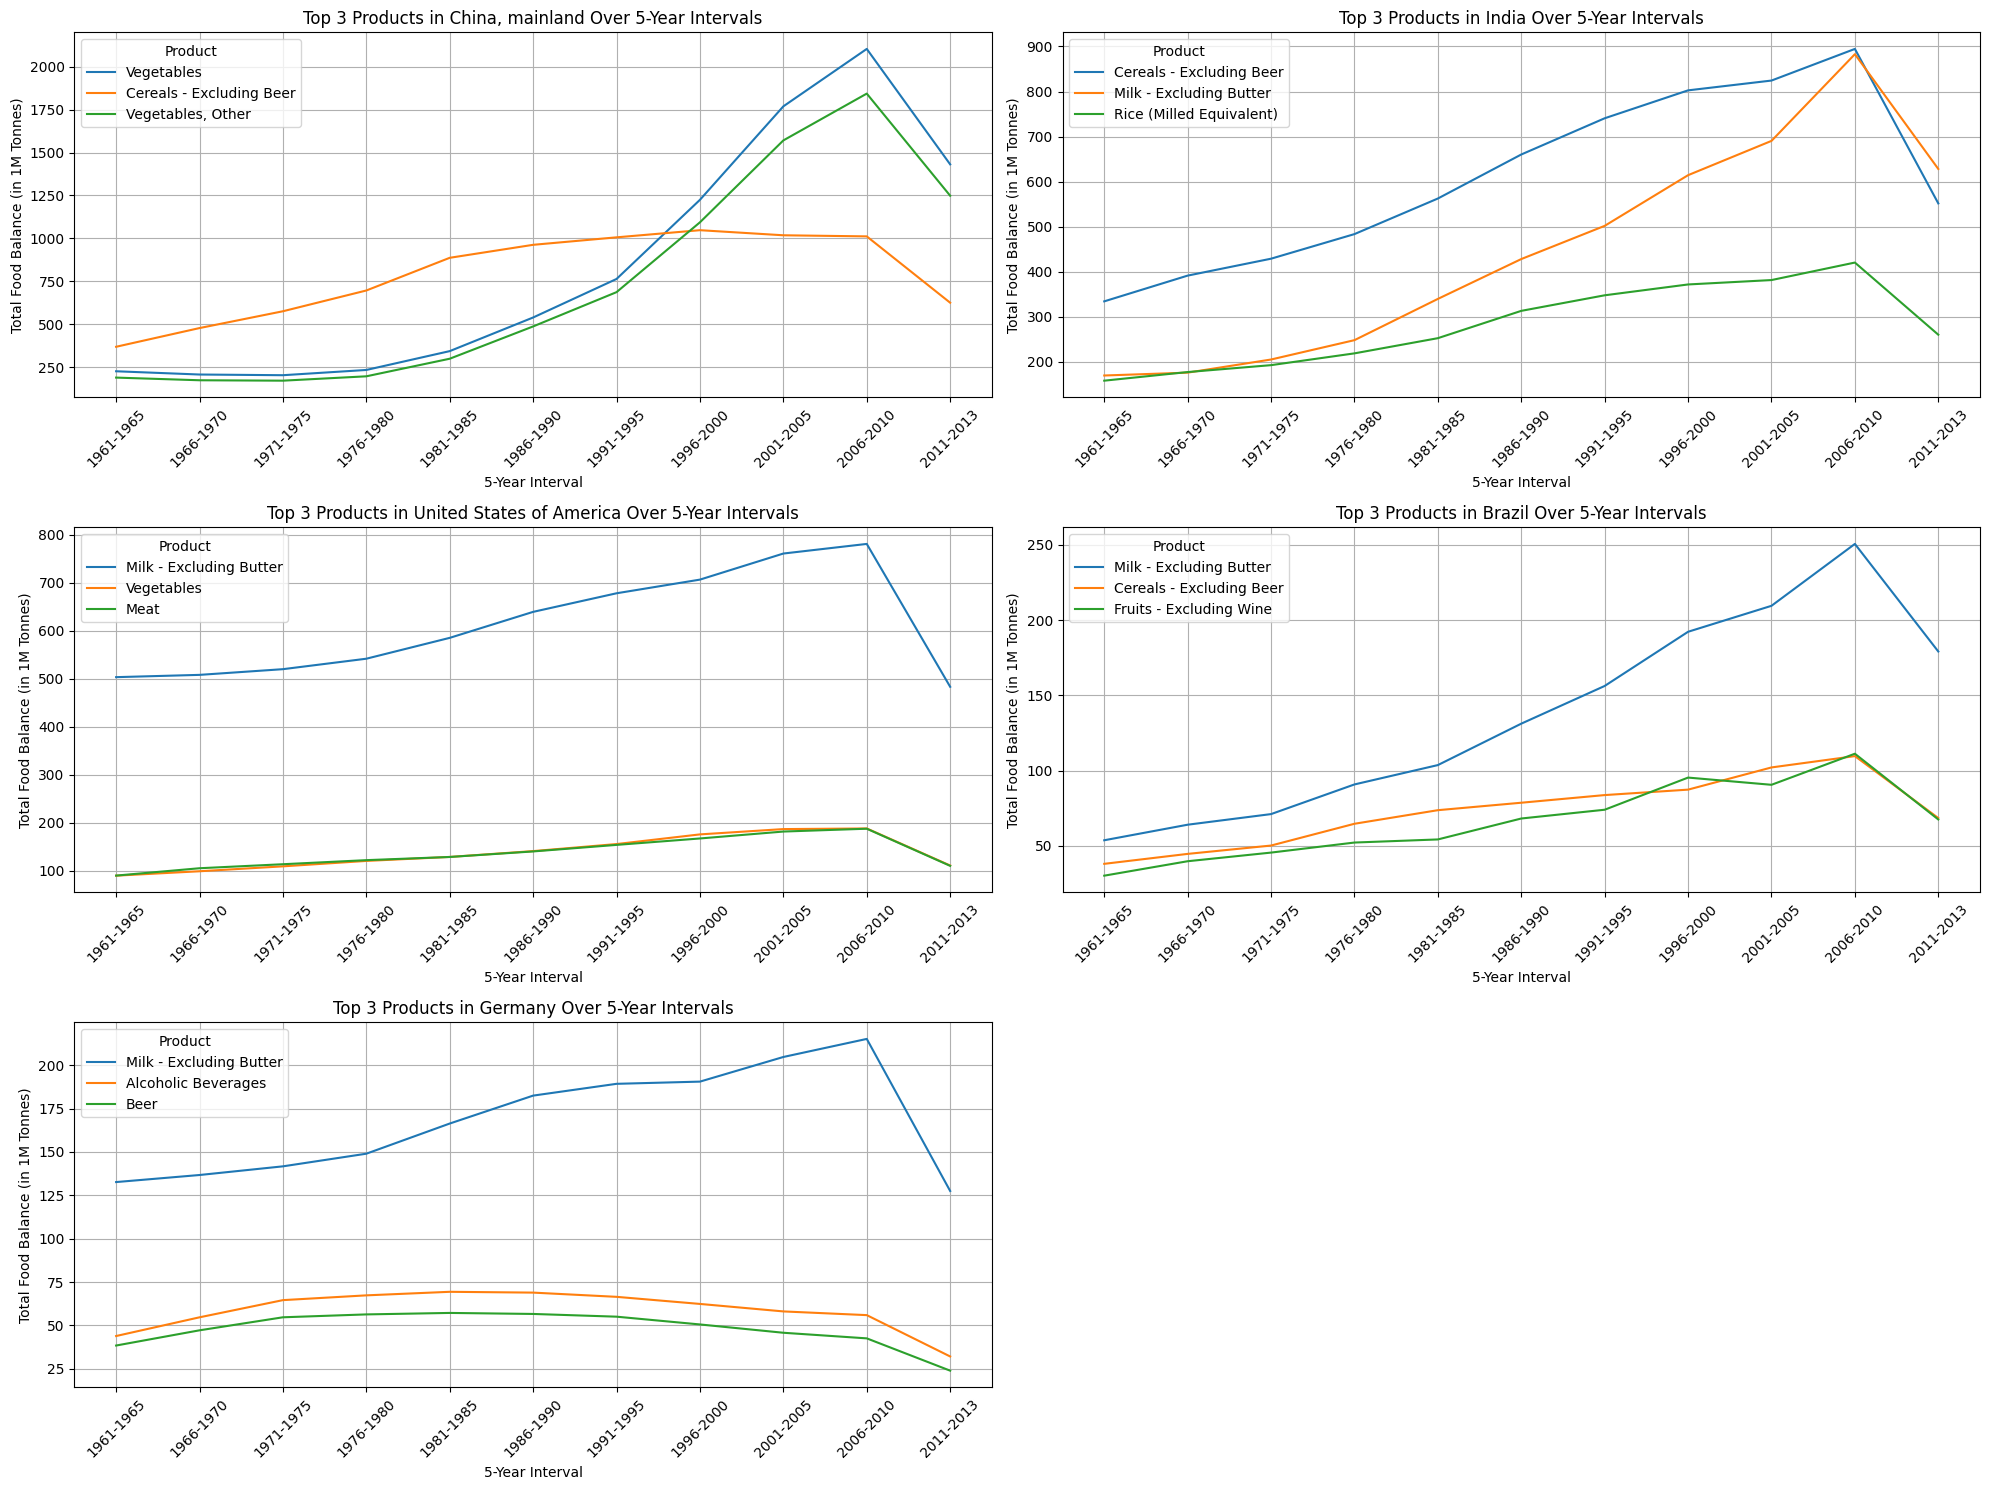

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter the data for Food
df_food = merged_df[merged_df['element'] == 'Food'].copy()

# Step 2: Identify the numeric columns (i.e., the year columns)
year_columns = [col for col in df_food.columns if col.startswith('y')]

# Step 3: Identify the top 5 areas based on the total food balance across all years
# We sum only over the year columns
top_areas = df_food.groupby('area')[year_columns].sum().sum(axis=1).nlargest(5).index

# Step 4: Filter the DataFrame for the top 5 areas
df_top_areas = df_food[df_food['area'].isin(top_areas)].copy()

# Step 5: Identify the top 3 products for each of the top 5 areas
top_products_by_area = {}
for area in top_areas:
    top_products = df_top_areas[df_top_areas['area'] == area].groupby('item')[year_columns].sum().sum(axis=1).nlargest(3).index
    top_products_by_area[area] = top_products

# Step 6: Filter the DataFrame to include only the top products for each top area
df_filtered = pd.DataFrame()
for area, products in top_products_by_area.items():
    df_area_products = df_top_areas[(df_top_areas['area'] == area) & (df_top_areas['item'].isin(products))]
    df_filtered = pd.concat([df_filtered, df_area_products])

# Step 7: Aggregate the data in 5-year intervals
intervals = {
    '1961-1965': ['y1961', 'y1962', 'y1963', 'y1964', 'y1965'],
    '1966-1970': ['y1966', 'y1967', 'y1968', 'y1969', 'y1970'],
    '1971-1975': ['y1971', 'y1972', 'y1973', 'y1974', 'y1975'],
    '1976-1980': ['y1976', 'y1977', 'y1978', 'y1979', 'y1980'],
    '1981-1985': ['y1981', 'y1982', 'y1983', 'y1984', 'y1985'],
    '1986-1990': ['y1986', 'y1987', 'y1988', 'y1989', 'y1990'],
    '1991-1995': ['y1991', 'y1992', 'y1993', 'y1994', 'y1995'],
    '1996-2000': ['y1996', 'y1997', 'y1998', 'y1999', 'y2000'],
    '2001-2005': ['y2001', 'y2002', 'y2003', 'y2004', 'y2005'],
    '2006-2010': ['y2006', 'y2007', 'y2008', 'y2009', 'y2010'],
    '2011-2013': ['y2011', 'y2012', 'y2013'],  # Last interval with 3 years only
}

for interval, years in intervals.items():
    df_filtered.loc[:, interval] = df_filtered.loc[:, years].sum(axis=1)/1000

# Step 8: Plot the time series for each area and its top 3 products
plt.figure(figsize=(20, 15))

for area in top_areas:
    plt.subplot(3, 2, list(top_areas).index(area) + 1)
    for product in top_products_by_area[area]:
        product_data = df_filtered[(df_filtered['area'] == area) & (df_filtered['item'] == product)]
        plt.plot(intervals.keys(), product_data[intervals.keys()].sum(), label=product)
    plt.title(f'Top 3 Products in {area} Over 5-Year Intervals')
    plt.xlabel('5-Year Interval')
    plt.ylabel('Total Food Balance (in 1M Tonnes)')
    plt.legend(title='Product')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

### 3.3 Choropleth Graphs

In [ ]:
# The Growth Rate per Country and its corresponding item

growth_df.head(10)

area  area_code                      item  Growth_y1962  \
0  Afghanistan          2        Wheat and products         -1.24   
1  Afghanistan          2  Rice (Milled Equivalent)          0.00   
2  Afghanistan          2       Barley and products          0.00   
3  Afghanistan          2       Barley and products          0.00   
4  Afghanistan          2        Maize and products          0.00   
5  Afghanistan          2        Maize and products          0.00   
6  Afghanistan          2       Millet and products          5.88   
7  Afghanistan          2            Cereals, Other           NaN   
8  Afghanistan          2     Potatoes and products        -12.61   
9  Afghanistan          2                Sugar cane          0.00   

   Growth_y1963  Growth_y1964  Growth_y1965  Growth_y1966  Growth_y1967  \
0        -12.50         17.05          2.62         -9.65         13.55   
1         -0.55         20.88          0.00        -11.36         18.46   
2          0.00          0.00          0.00         -1.32         -5.33   
3          0.00          0.42          0.00         -0.42         -5.06   
4          1.90          0.93          0.00          0.00          8.80   
5          1.74          1.22          0.00         -0.48          9.93   
6          5.56          5.26          5.00          4.76          4.55   
7           NaN           NaN           NaN           NaN           NaN   
8          6.19          6.80          2.73          3.54          9.40   
9          0.00          0.00        -31.11        -54.84         35.71   

   Growth_y1968  ...  Growth_y2004  Growth_y2005  Growth_y2006  Growth_y2007  \
0         -0.39  ...          4.98          7.29          6.25         12.42   
1          1.73  ...         -8.91          6.21         22.70        -16.67   
2          1.41  ...         20.83        306.90         11.02          0.38   
3          0.89  ...         28.47        -76.76          2.33          9.09   
4         -1.28  ...         90.48         73.33         12.02          6.87   
5         -1.32  ...         97.44        -71.00         22.39        -18.29   
6          4.35  ...         -6.25         40.00        -47.62         72.73   
7           NaN  ...        100.00        -50.00          0.00       -100.00   
8          1.56  ...        -20.46          6.52          0.00        -11.56   
9         57.89  ...         -1.96        -42.00        110.34          6.56   

   Growth_y2008  Growth_y2009  Growth_y2010  Growth_y2011  Growth_y2012  \
0          2.11          6.73          1.48          2.30          2.10   
1          7.69        -15.31          6.51          7.69        -10.71   
2        -12.55         64.78        -16.89        -35.56         80.79   
3         29.17        -11.29          9.09         20.00          8.33   
4         -0.80        -21.05         -8.72          7.30          4.71   
5          2.99          2.90         15.49        -10.98          5.48   
6         10.53        -14.29        -22.22          0.00          0.00   
7           NaN           NaN           NaN           NaN           NaN   
8         -6.92          3.31        -23.20        -11.98         15.98   
9        -16.92        111.11        -27.19          0.00        -16.87   

   Growth_y2013  
0          1.77  
1         -0.71  
2         -1.91  
3         14.10  
4          0.00  
5         -1.30  
6        -14.29  
7           NaN  
8         17.35  
9         17.39  

[10 rows x 55 columns]

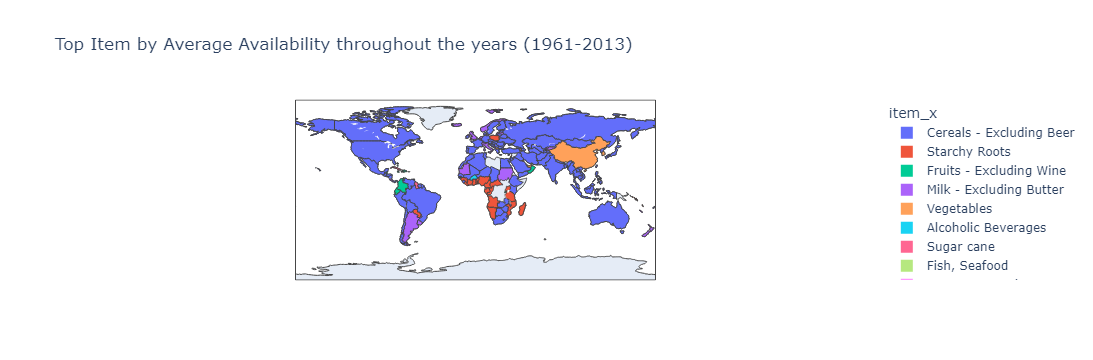

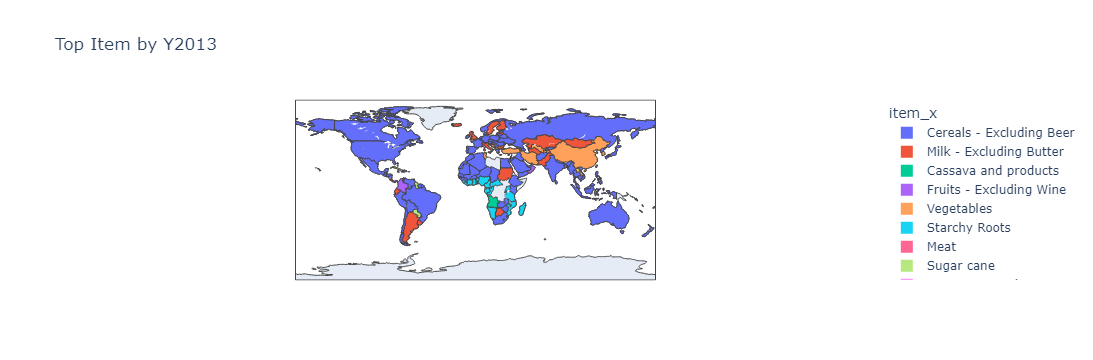

In [ ]:
import plotly.express as px

merged_df_choro = pd.merge(fao, faostat, on='area_code', how='inner')
year_columns_choro = [col for col in merged_df_corr.columns if col.startswith(('y1', 'y2'))]
merged_df_choro['average_availability'] = merged_df_corr[year_columns_corr].mean(axis=1)


# Find the top item by 'average_availability'
top_avg_availability = merged_df_choro.loc[merged_df_choro.groupby('area_x')['average_availability'].idxmax()]

# Find the top item by 'Y2013'
top_Y2013 = merged_df_choro.loc[merged_df_choro.groupby('area_x')['y2013'].idxmax()]

# Create choropleth map for 'average_availability'
fig_avg = px.choropleth(top_avg_availability, locations="area_x", locationmode='country names',
                        color='item_x', hover_name='item_x',
                        title="Top Item by Average Availability throughout the years (1961-2013)")
fig_avg.show()

# Create choropleth map for 'Y2013'
fig_Y2013 = px.choropleth(top_Y2013, locations="area_x", locationmode='country names',
                          color='item_x', hover_name='item_x',
                          title="Top Item by Y2013")
fig_Y2013.show()


## Summary and other recommendations:
Summary:
*   The dominant players of the global food production and availability from 1961 to 2013 are the: United States, India, and China, with the US leading in high-calorie foods and China and India focusing on staple crops and milk.
*   Different regions specialize in different food categories, the Americas having a diverse agricultural base, China focusing on staples, and Europe excelling in milk, cereals, and alcohol.
*   Smaller countries often specialize in low-calorie products, with Madagascar and Indonesia leading in cloves and the Central African Republic and Ghana in palm kernels.
*   The dominance of few countries could raise a concern about global food security, as reliance on a few sources can lead to vulnerabilities from geopolitical instability, natural disasters, or trade disputes.

Recommendations:
*   We recommend that the FAO develop a robust early warning system to identify countries at risk of food insecurity due to low production growth. Involving monitoring key indicators like food availability trend.
*   FAO must provide tailored technical support to countries struggling with production growth (acc. to the Global Average Food/Feed Availability). Including sharing best practices in sustainable agriculture, supporting the development of national food security strategies and investment plans, and agricultural research and development particularly in disaster-prone countries.

